In [3]:
import math

import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '../dataset/cgt/new_consolidated.csv'
df = pd.read_csv(file_path, sep=',')

Dataset: CodeSmells
  Unique fp_sol: 551
  Unique fp_sol2: 532
  Unique fp_bytecode: 551
  Unique fp_runtime: 504
  Unique fp_ast: 287
  Unique fp_opcode: 103
  Unique fp_cfg: 470

Dataset: ContractFuzzer
  Unique fp_sol: 352
  Unique fp_sol2: 352
  Unique fp_bytecode: 274
  Unique fp_runtime: 347
  Unique fp_ast: 210
  Unique fp_opcode: 72
  Unique fp_cfg: 275

Dataset: Doublade
  Unique fp_sol: 237
  Unique fp_sol2: 237
  Unique fp_bytecode: 184
  Unique fp_runtime: 181
  Unique fp_ast: 134
  Unique fp_opcode: 48
  Unique fp_cfg: 141

Dataset: EthRacer
  Unique fp_sol: 109
  Unique fp_sol2: 109
  Unique fp_bytecode: 109
  Unique fp_runtime: 109
  Unique fp_ast: 65
  Unique fp_opcode: 14
  Unique fp_cfg: 90

Dataset: EverEvolvingG
  Unique fp_sol: 264
  Unique fp_sol2: 264
  Unique fp_bytecode: 264
  Unique fp_runtime: 263
  Unique fp_ast: 190
  Unique fp_opcode: 57
  Unique fp_cfg: 76

Dataset: JiuZhou
  Unique fp_sol: 164
  Unique fp_sol2: 162
  Unique fp_bytecode: 158
  Unique fp_r

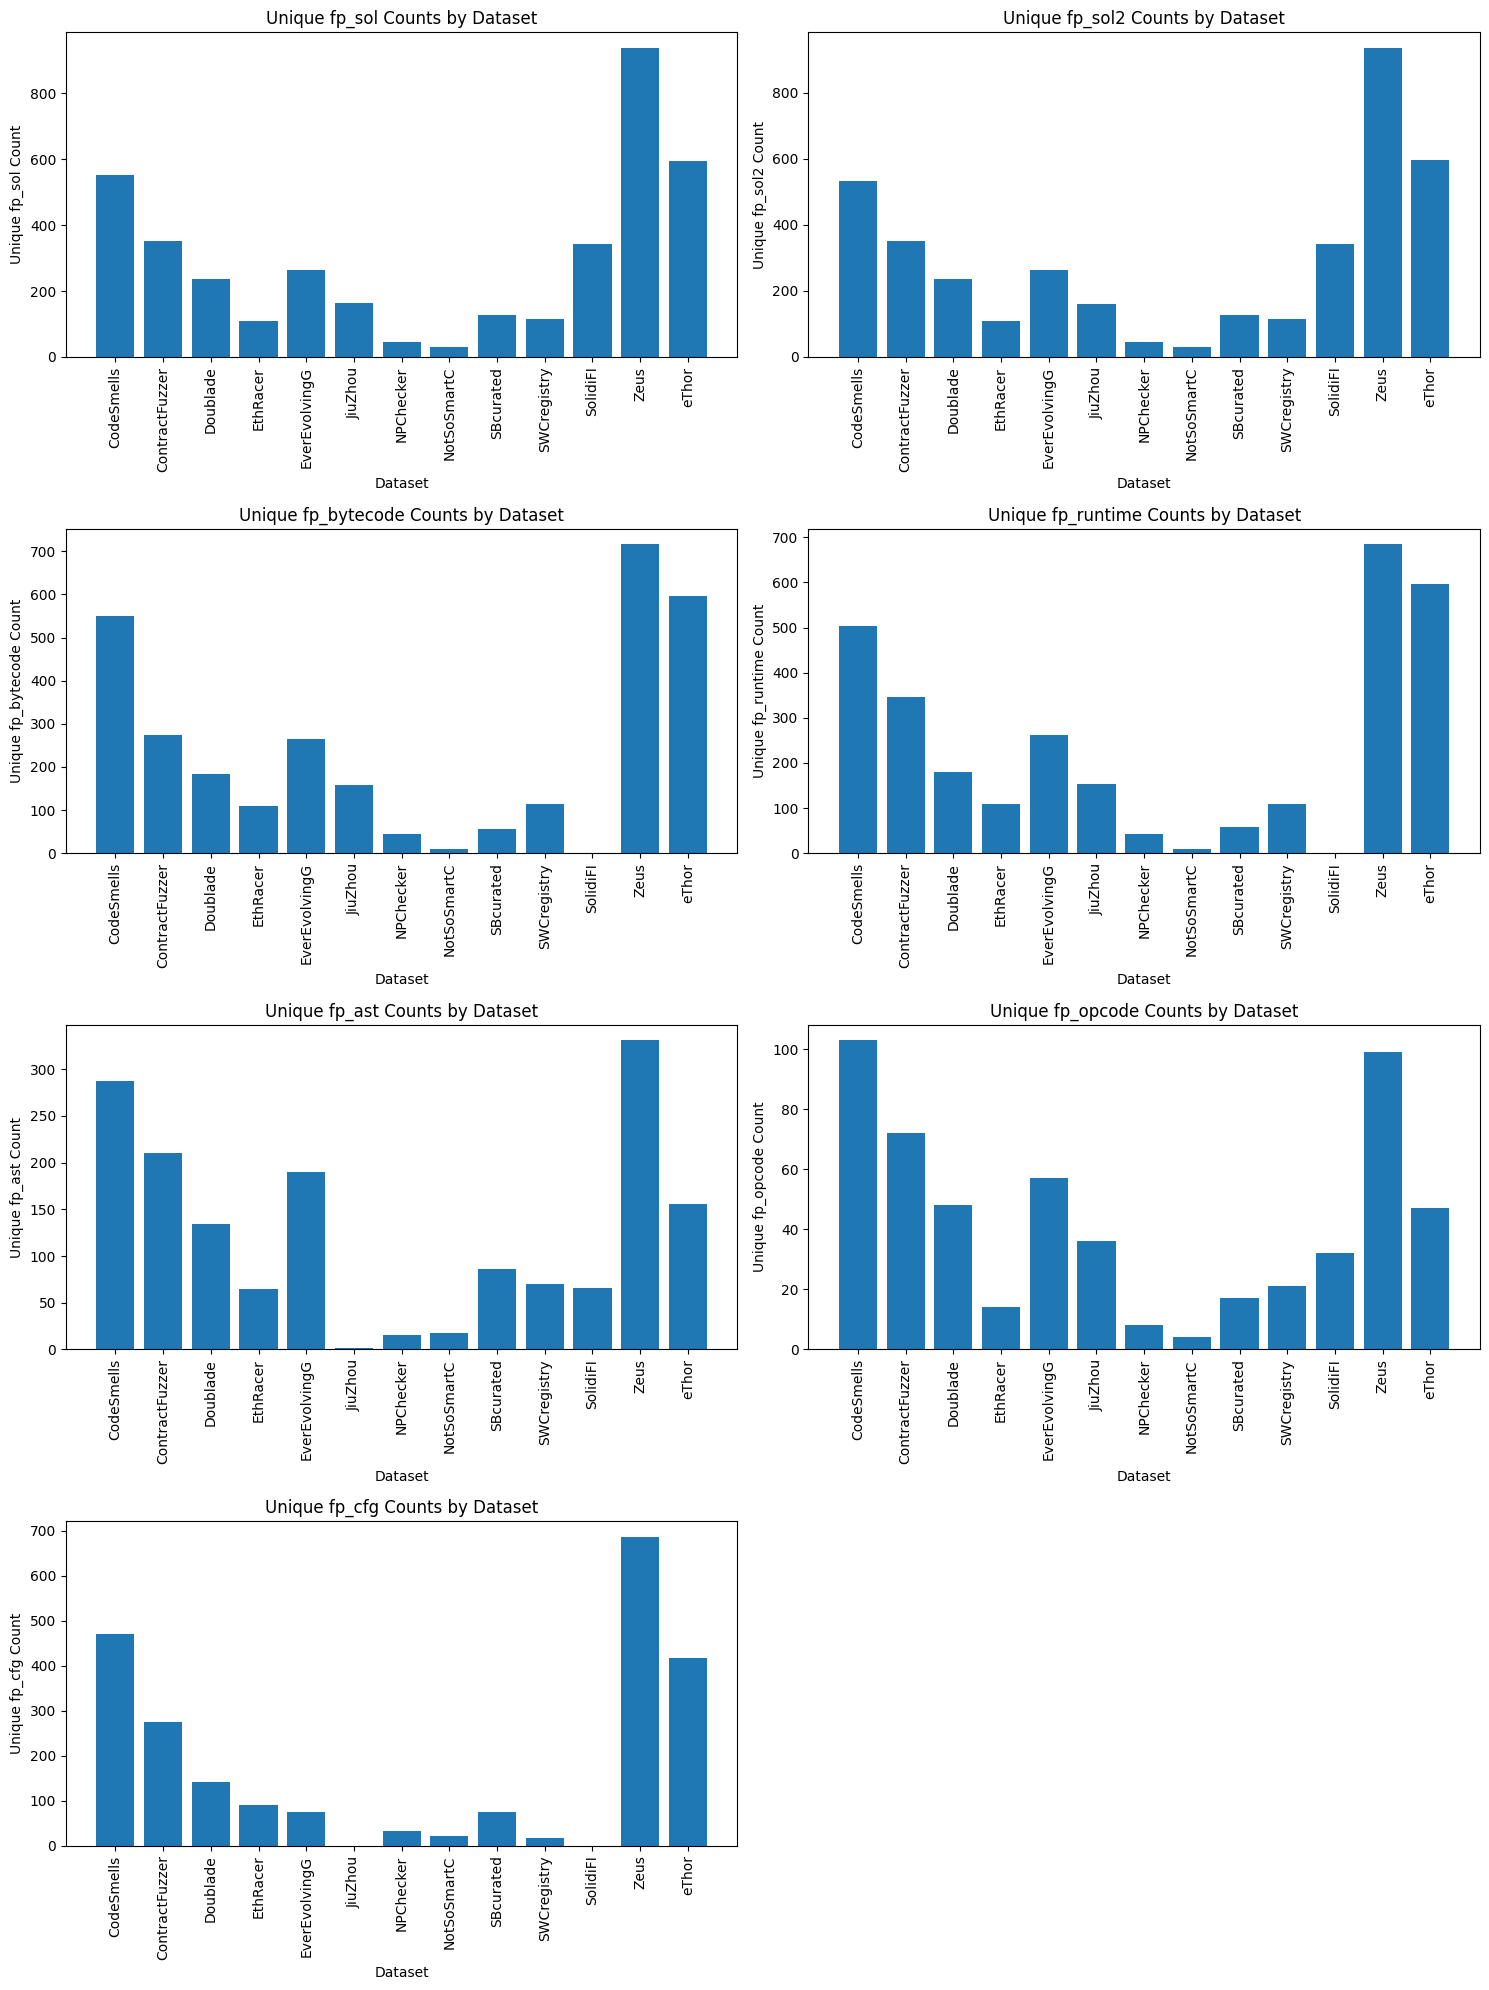

In [2]:
# Identify all columns starting with 'fp_'
fp_columns = [col for col in df.columns if col.startswith('fp_')]

# Group by the 'dataset' column and calculate unique counts for all 'fp_' columns
grouped = df.groupby('dataset').agg({col: pd.Series.nunique for col in fp_columns}).reset_index()

# Calculate the total unique counts across all datasets
totals = grouped[fp_columns].sum().to_frame().T
totals['dataset'] = 'Total'
totals = totals[['dataset'] + fp_columns]

# Append the totals row to the grouped DataFrame
grouped = pd.concat([grouped, totals], ignore_index=True)

# Convert 'dataset' column to string type
grouped['dataset'] = grouped['dataset'].astype(str)

# Separate the total row from the rest of the data
grouped_no_total = grouped[grouped['dataset'] != 'Total']

# Print the results
for index, row in grouped.iterrows():
    dataset = row['dataset']
    print(f"Dataset: {dataset}")
    for col in fp_columns:
        print(f"  Unique {col}: {row[col]}")
    print()

# Plot histograms for all 'fp_' columns, excluding the 'Total' row
num_cols = len(fp_columns)
num_rows = (num_cols + 1) // 2  # Ensure there are enough rows for all subplots

fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten axs in case it's 2D
axs = axs.ravel()

for i, col in enumerate(fp_columns):
    axs[i].bar(grouped_no_total['dataset'], grouped_no_total[col])
    axs[i].set_title(f'Unique {col} Counts by Dataset')
    axs[i].set_xlabel('Dataset')
    axs[i].set_ylabel(f'Unique {col} Count')
    axs[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


Number of unique SWC values for each dataset (case insensitive):
dataset
CodeSmells        11
ContractFuzzer     7
Doublade           5
EthRacer           1
EverEvolvingG      4
JiuZhou           34
NPChecker          5
NotSoSmartC       13
SBcurated         16
SWCregistry       33
SolidiFI           7
Zeus               7
eThor              1
Name: swc, dtype: int64


Number of unique DASP values for each dataset (case insensitive):
dataset
CodeSmells         6
ContractFuzzer     7
Doublade           5
EthRacer           1
EverEvolvingG      3
JiuZhou           10
NPChecker          5
NotSoSmartC        8
SBcurated         10
SWCregistry        9
SolidiFI           6
Zeus               7
eThor              1
Name: dasp, dtype: int64


Number of unique PROPERTY values for each dataset (case insensitive):
dataset
CodeSmells        20
ContractFuzzer     7
Doublade           5
EthRacer           2
EverEvolvingG      5
JiuZhou           52
NPChecker          5
NotSoSmartC       18
SBcurate

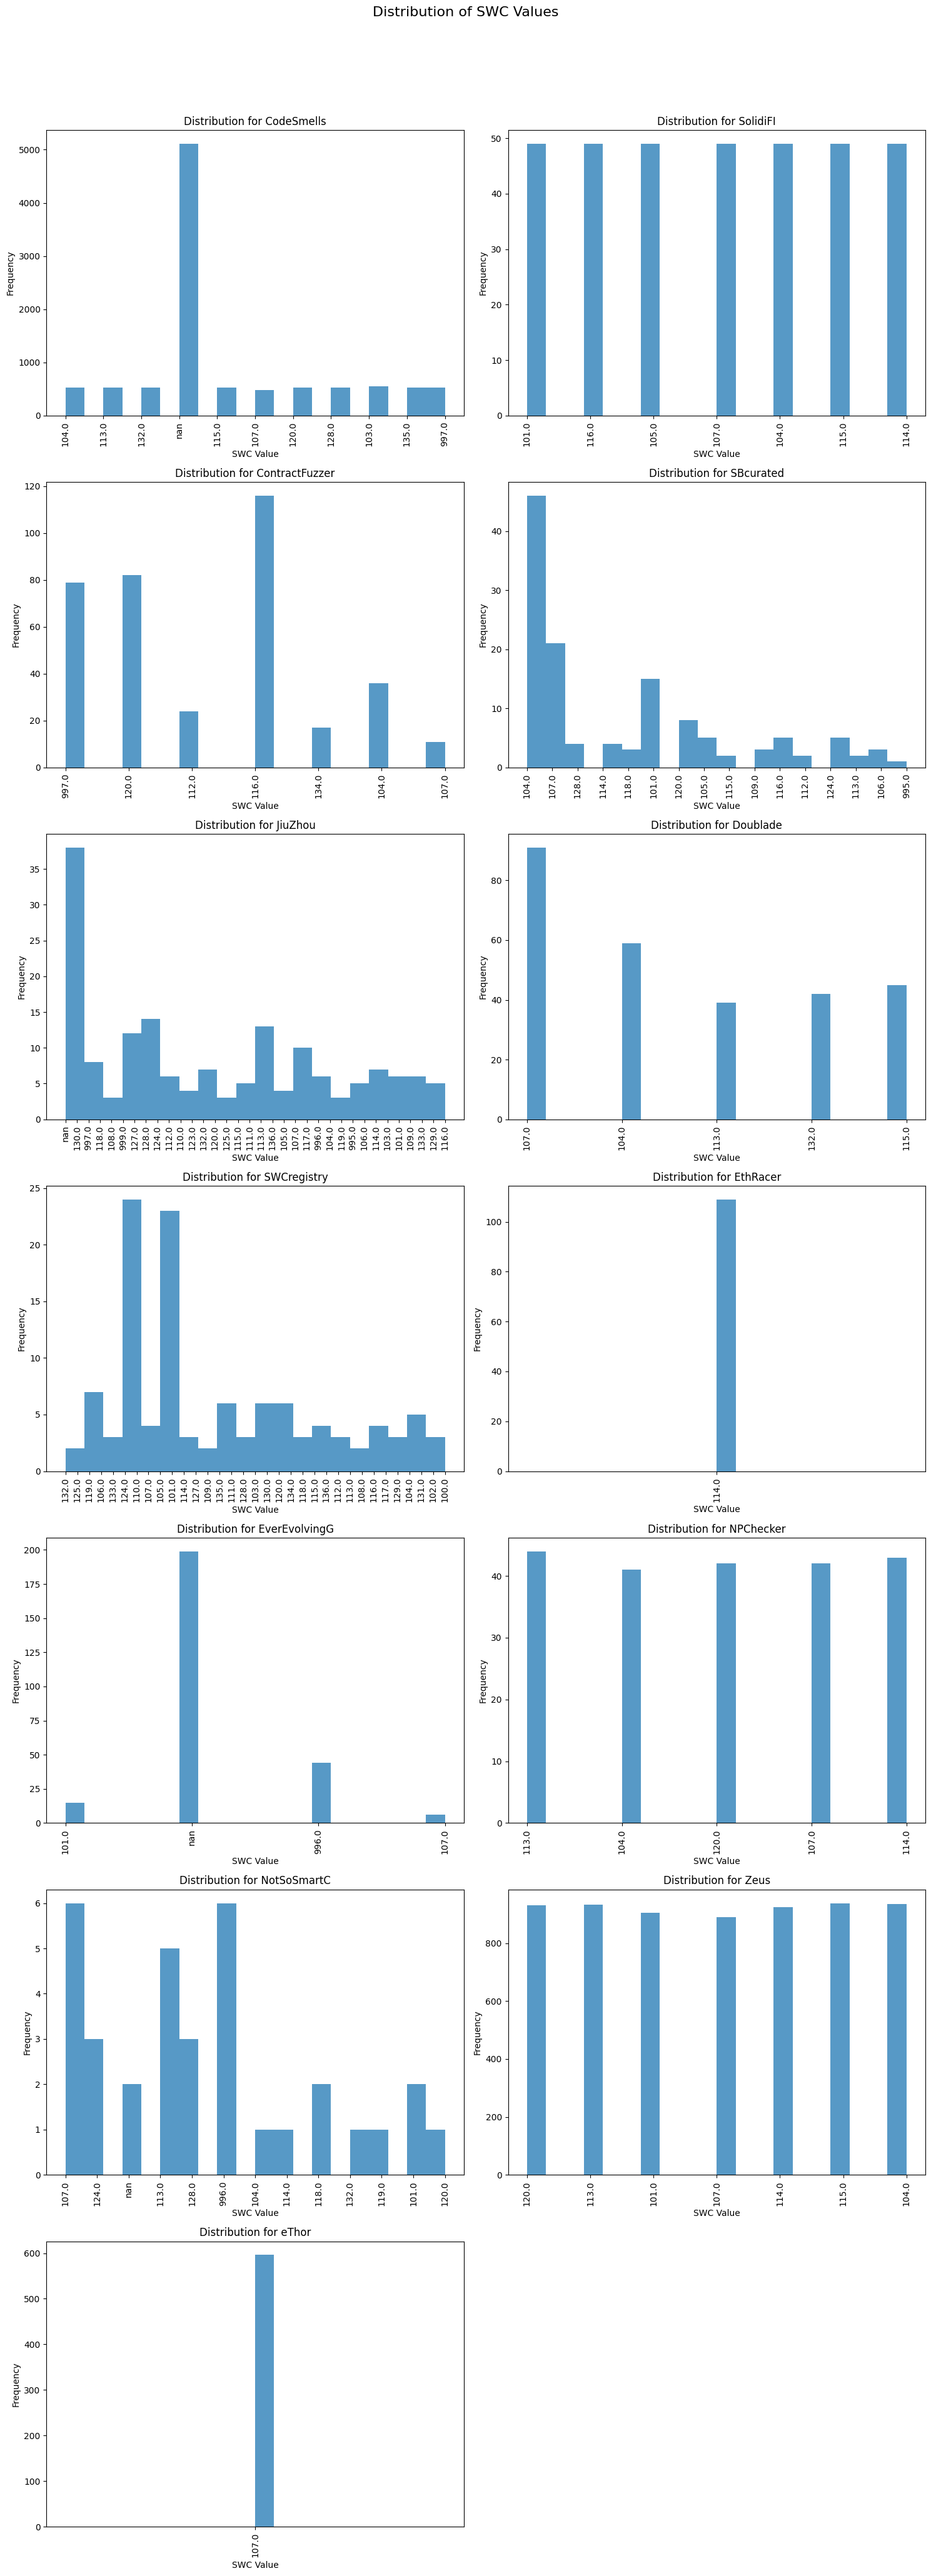

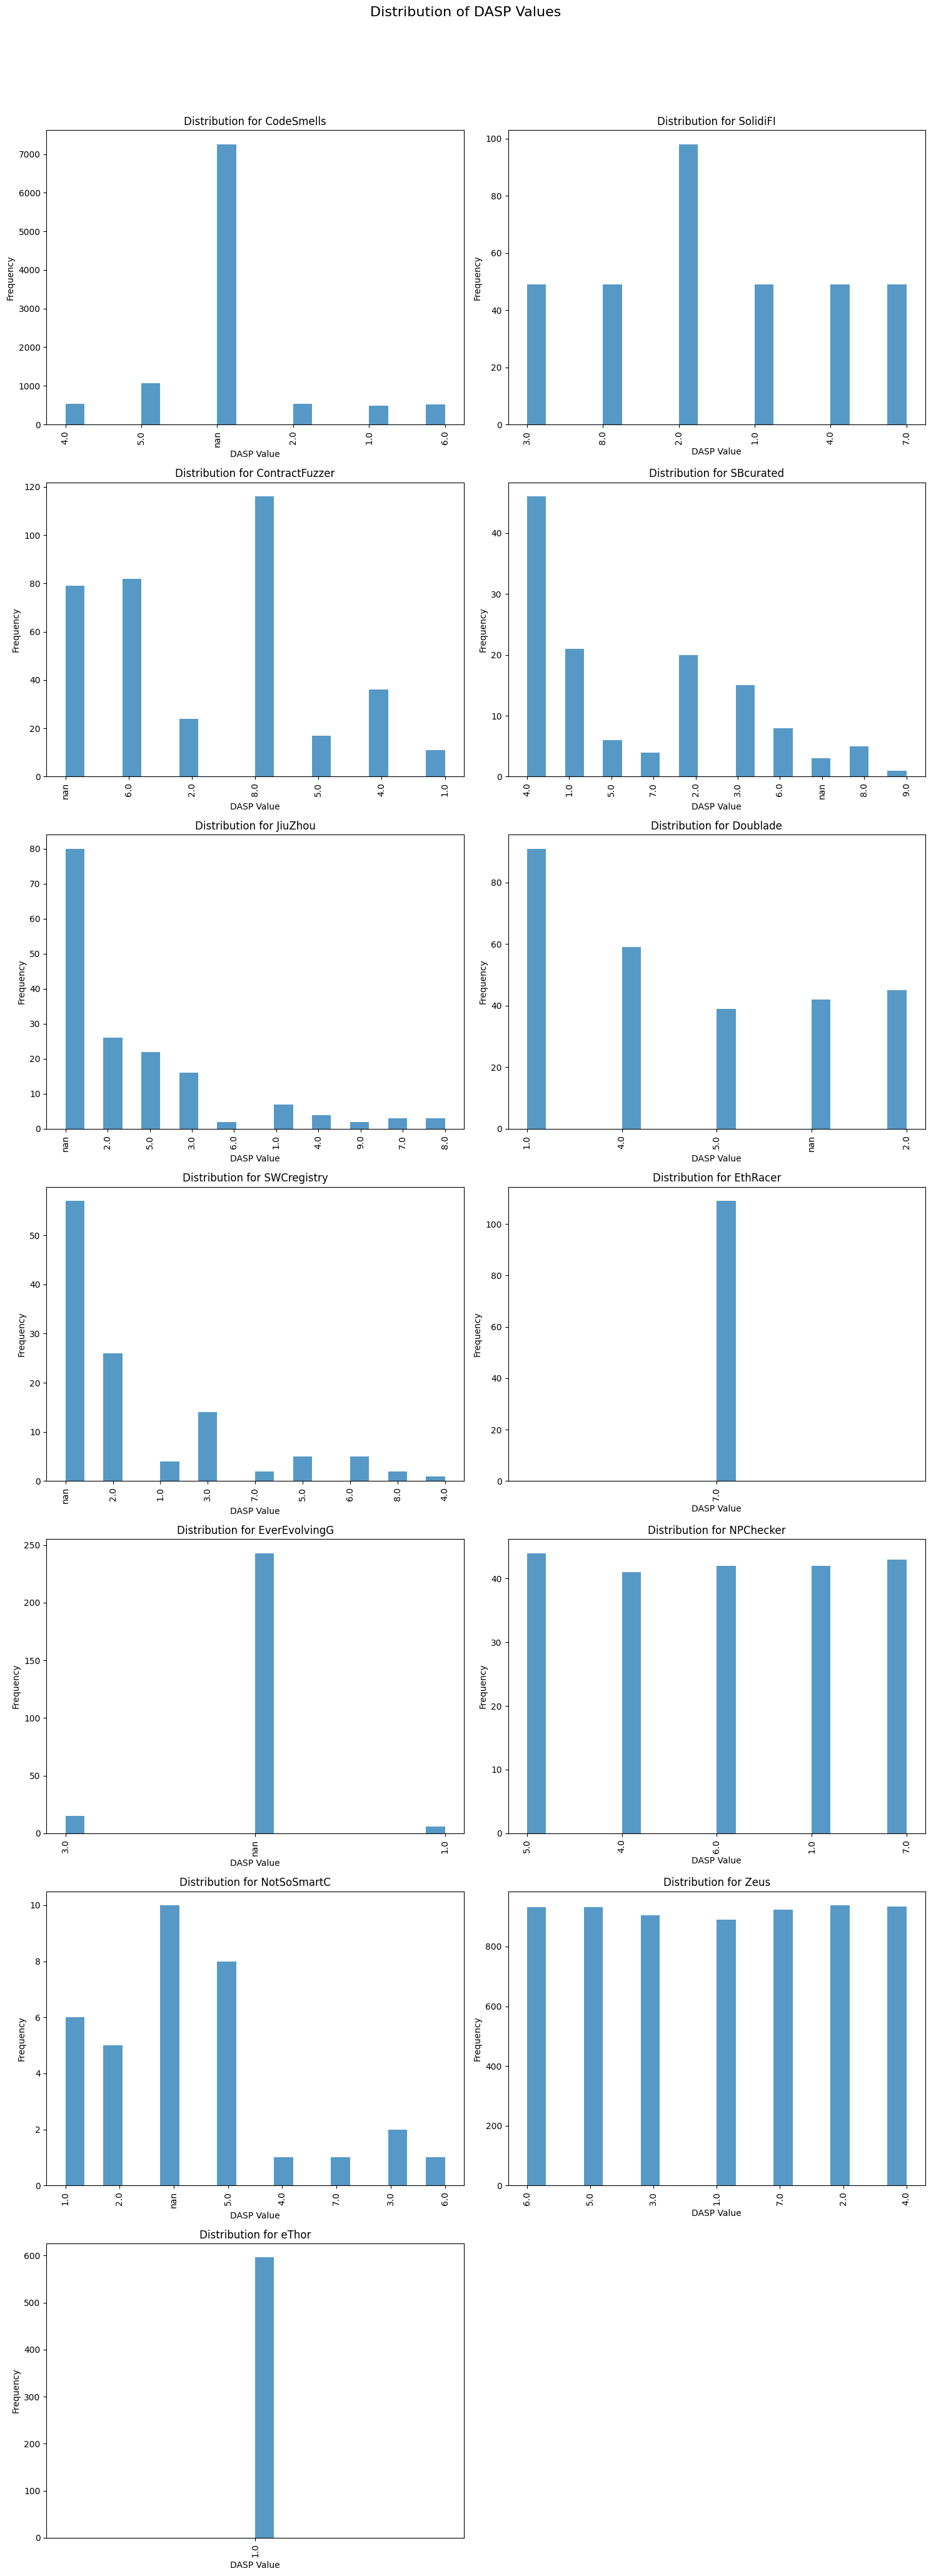

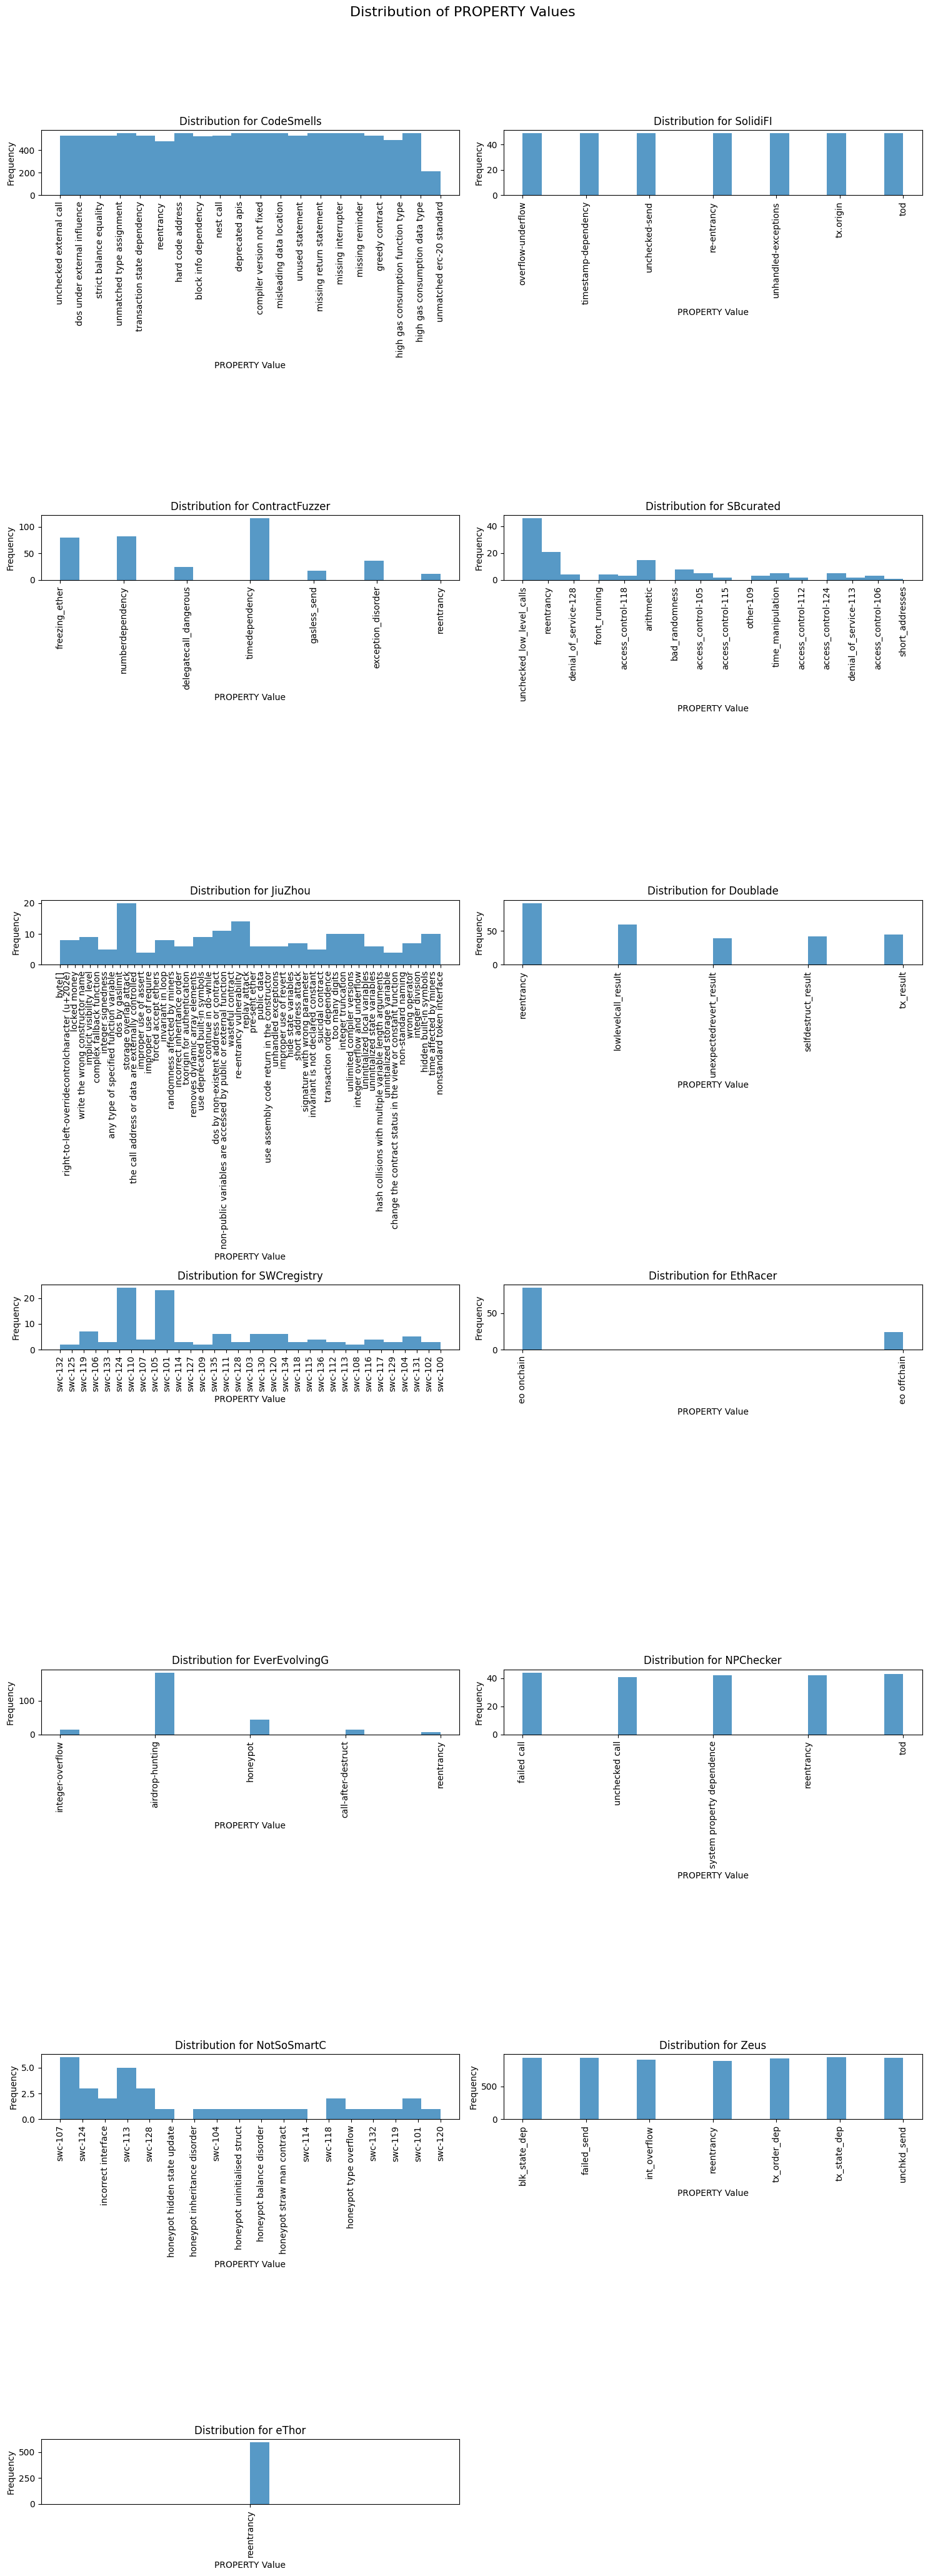

In [7]:
# Updated columns to analyze (including "property")
columns_to_analyze = ['swc', 'dasp', 'property']

# Step 1: Unique Values for SWC, DASP, and Property
def calculate_unique_values(df, columns):
    # Convert specified columns to lowercase strings
    df_lower = df.copy()
    df_lower[columns] = df_lower[columns].astype(str).apply(lambda x: x.str.lower())

    for column in columns:
        # Drop NaNs and calculate unique counts
        values = df_lower[['dataset', column]].dropna()
        unique_counts = values.groupby('dataset')[column].nunique()

        print(f"Number of unique {column.upper()} values for each dataset (case insensitive):")
        print(unique_counts)
        print("\n")


# Step 2: Plot Distribution for SWC, DASP, and Property
def plot_distribution(df, columns):
    unique_datasets = df['dataset'].unique()
    n_datasets = len(unique_datasets)

    # Determine subplot grid size
    ncols = 2  # Adjust number of columns as needed
    nrows = math.ceil(n_datasets / ncols)

    # Convert specified columns to lowercase strings
    df_lower = df.copy()
    df_lower[columns] = df_lower[columns].astype(str).apply(lambda x: x.str.lower())

    for column in columns:
        fig, axs = plt.subplots(nrows, ncols, figsize=(15, 6 * nrows))  # Enlarged figure size
        axs = axs.flatten()

        for i, dataset in enumerate(unique_datasets):
            dataset_values = df_lower[df_lower['dataset'] == dataset][column].dropna()
            axs[i].hist(dataset_values, bins=20, alpha=0.75)
            axs[i].set_title(f'Distribution for {dataset}', fontsize=12)
            axs[i].set_xlabel(f'{column.upper()} Value', fontsize=10)
            axs[i].set_ylabel('Frequency', fontsize=10)
            axs[i].tick_params(axis='x', rotation=90)

        # Remove any unused subplots
        for j in range(i + 1, len(axs)):
            fig.delaxes(axs[j])

        fig.suptitle(f'Distribution of {column.upper()} Values', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
        plt.show()


# Execute the analysis
calculate_unique_values(df, columns_to_analyze)
plot_distribution(df, columns_to_analyze)


Statistics for dataset: CodeSmells and column: property
        frequency
count  152.000000
mean     3.618421
std      8.678156
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max     77.000000
                                  property_combination  frequency
0    (Compiler Version not fixed, High Gas Consumpt...         77
1    (Compiler Version not fixed, Deprecated APIs, ...         46
2    (Compiler Version not fixed, High Gas Consumpt...         37
3    (Compiler Version not fixed, Missing Interrupter)         31
4    (Compiler Version not fixed, Deprecated APIs, ...         25
..                                                 ...        ...
147  (Compiler Version not fixed, Deprecated APIs, ...          1
148  (Compiler Version not fixed, Missing Interrupt...          1
149  (Compiler Version not fixed, Deprecated APIs, ...          1
150  (Compiler Version not fixed, Deprecated APIs, ...          1
151  (Block Info Dependency, Deprecated APIs, Hard ...  

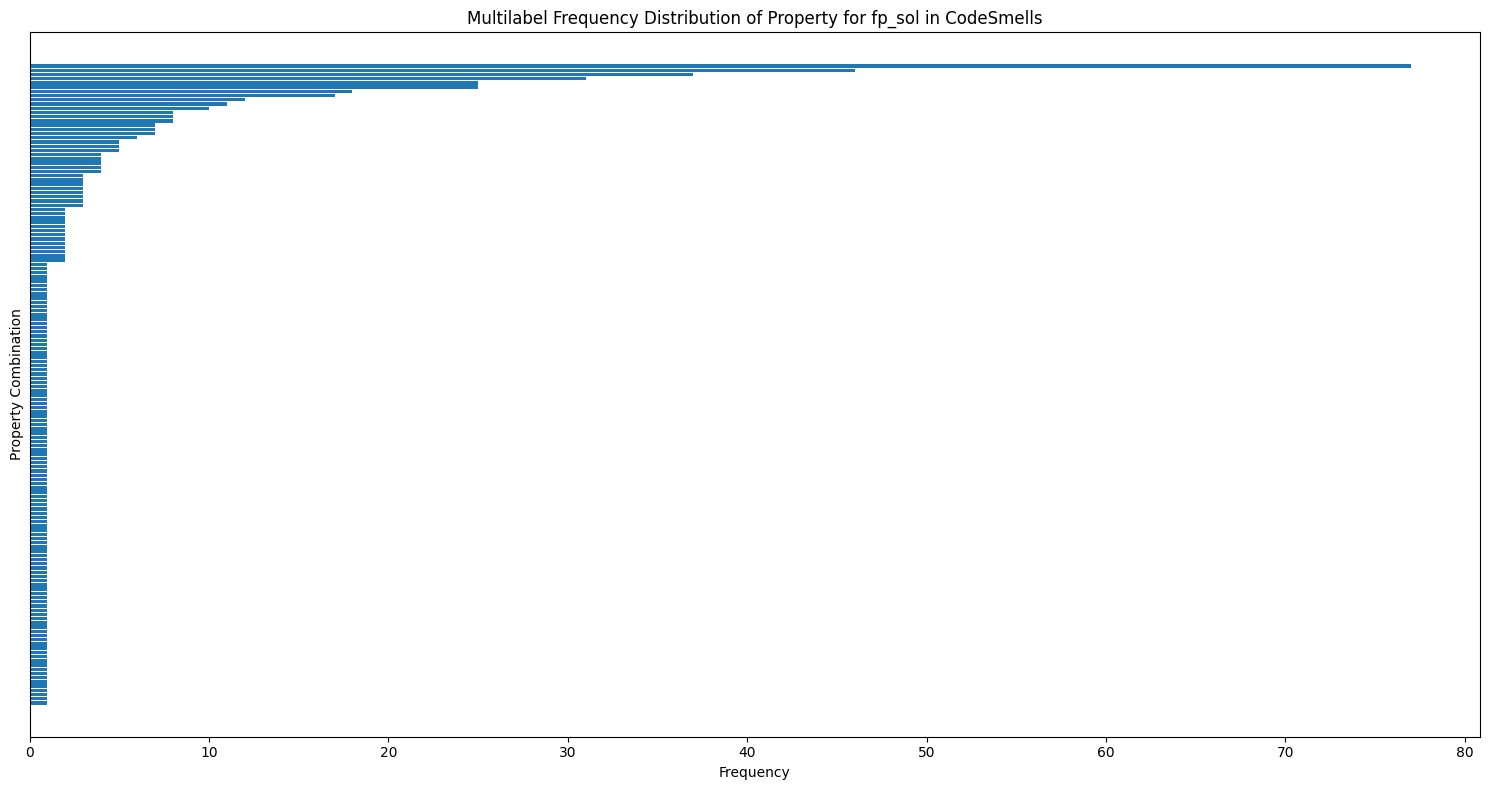

Statistics for dataset: CodeSmells and column: swc
        frequency
count   90.000000
mean     6.111111
std     19.752084
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max    135.000000
                                swc_combination  frequency
0                        (nan, nan, nan, 103.0)        135
1                             (nan, nan, 103.0)        124
2                                  (nan, 103.0)         45
3                   (nan, 103.0, nan, nan, nan)         29
4                               (nan, nan, nan)         22
..                                          ...        ...
85  (128.0, nan, nan, 103.0, 113.0, nan, 120.0)          1
86           (103.0, 107.0, nan, nan, nan, nan)          1
87                  (nan, nan, nan, 103.0, nan)          1
88                (103.0, 104.0, nan, nan, nan)          1
89                  (nan, nan, nan, nan, 120.0)          1

[90 rows x 2 columns]


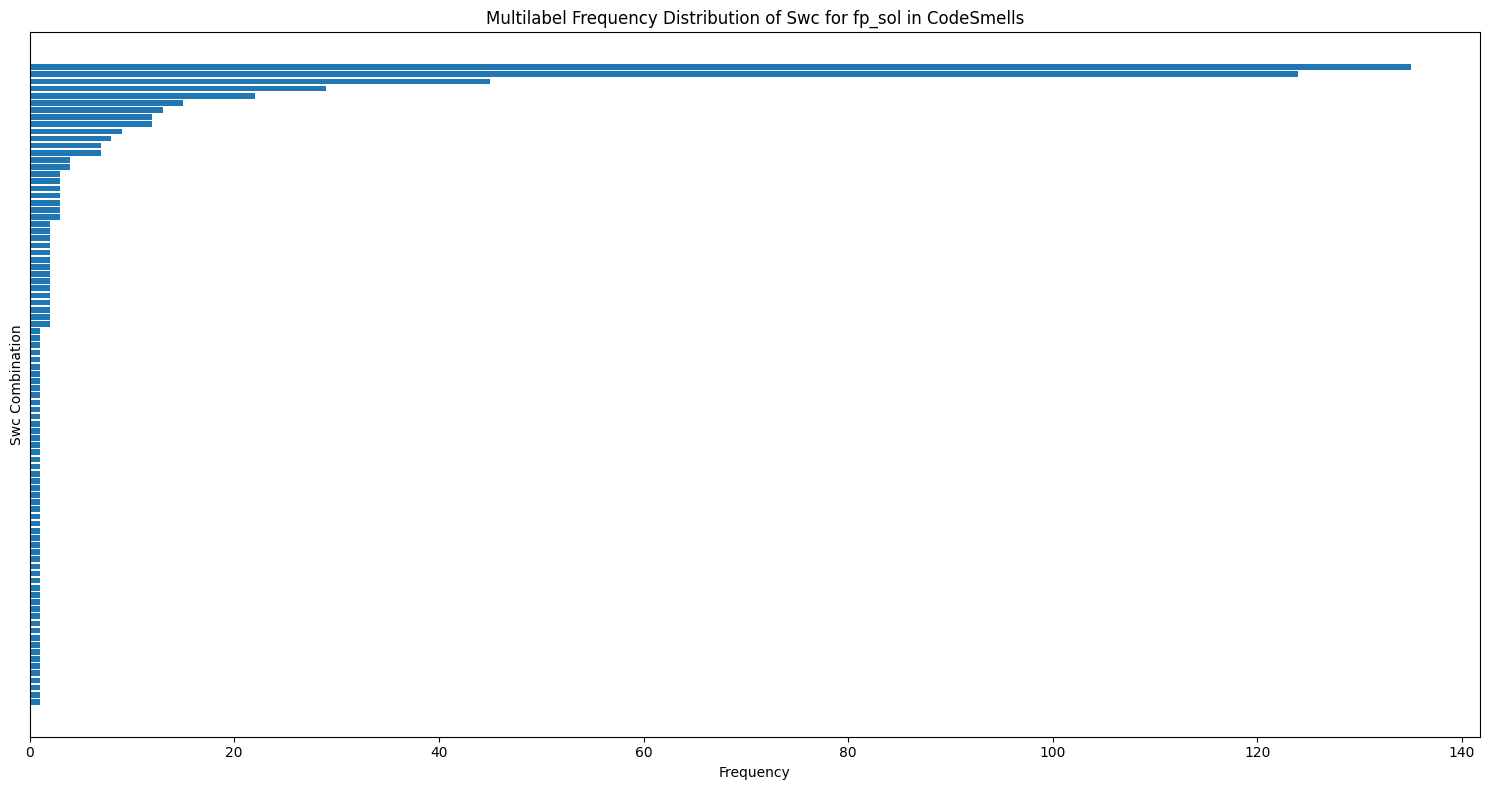

Statistics for dataset: CodeSmells and column: dasp
        frequency
count   55.000000
mean    10.000000
std     31.789236
min      1.000000
25%      1.000000
50%      1.000000
75%      3.500000
max    163.000000
                            dasp_combination  frequency
0                            (nan, nan, nan)        163
1                       (nan, nan, nan, nan)        163
2                  (nan, nan, nan, nan, nan)         60
3                                 (nan, nan)         53
4             (nan, nan, nan, nan, nan, nan)         13
5                                     (nan,)         11
6                       (nan, nan, 6.0, nan)          5
7             (nan, 6.0, nan, nan, nan, nan)          5
8                       (nan, nan, 4.0, nan)          5
9        (nan, nan, nan, nan, nan, nan, nan)          4
10                      (nan, nan, nan, 6.0)          4
11                 (1.0, nan, nan, nan, nan)          4
12                           (nan, nan, 6.0)          4
13

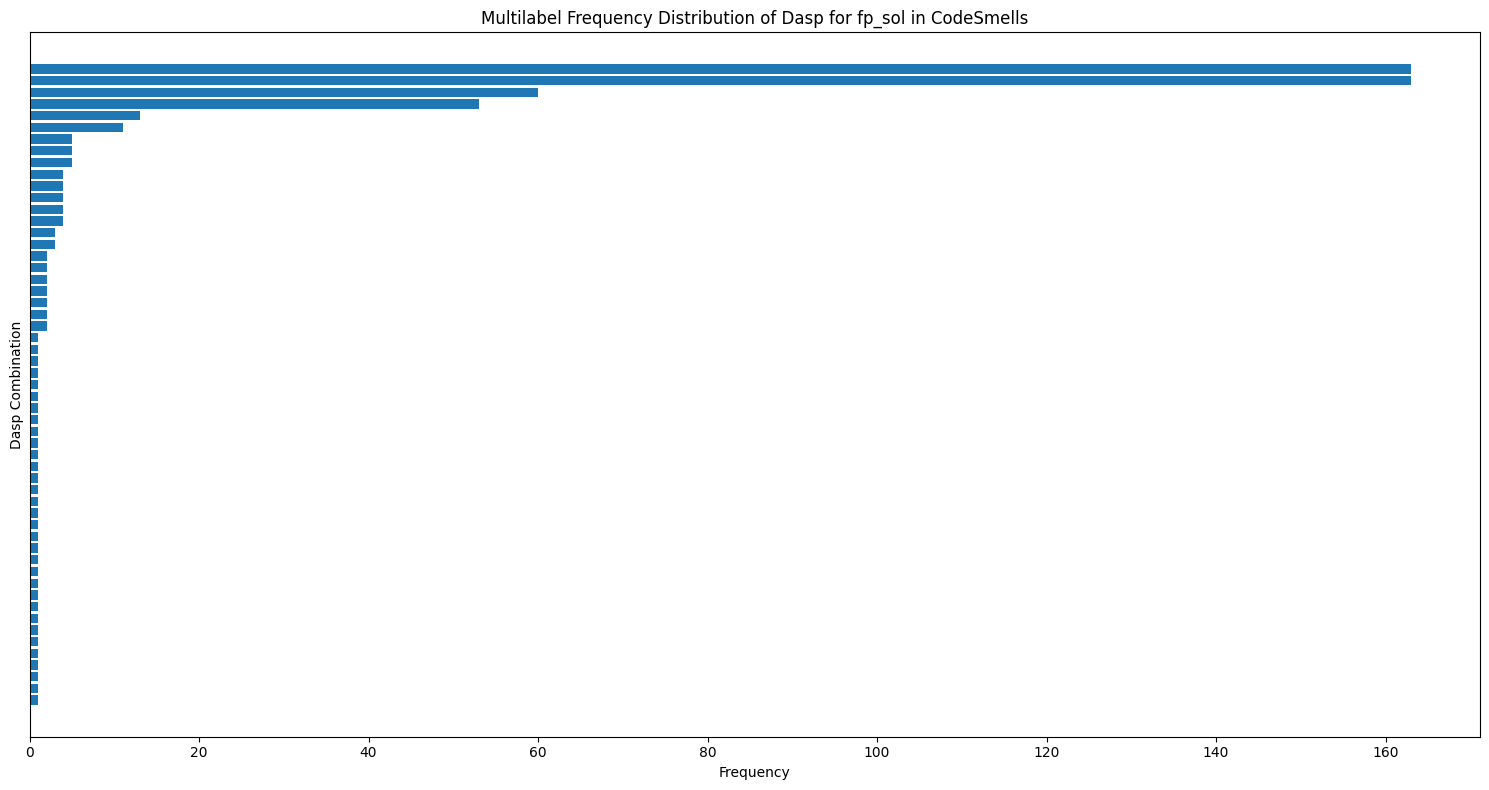

Statistics for dataset: SolidiFI and column: property
       frequency
count        7.0
mean        49.0
std          0.0
min         49.0
25%         49.0
50%         49.0
75%         49.0
max         49.0
      property_combination  frequency
0        (Unchecked-Send,)         49
1             (tx.origin,)         49
2                   (TOD,)         49
3    (Overflow-Underflow,)         49
4  (Unhandled-Exceptions,)         49
5  (Timestamp-Dependency,)         49
6           (Re-entrancy,)         49


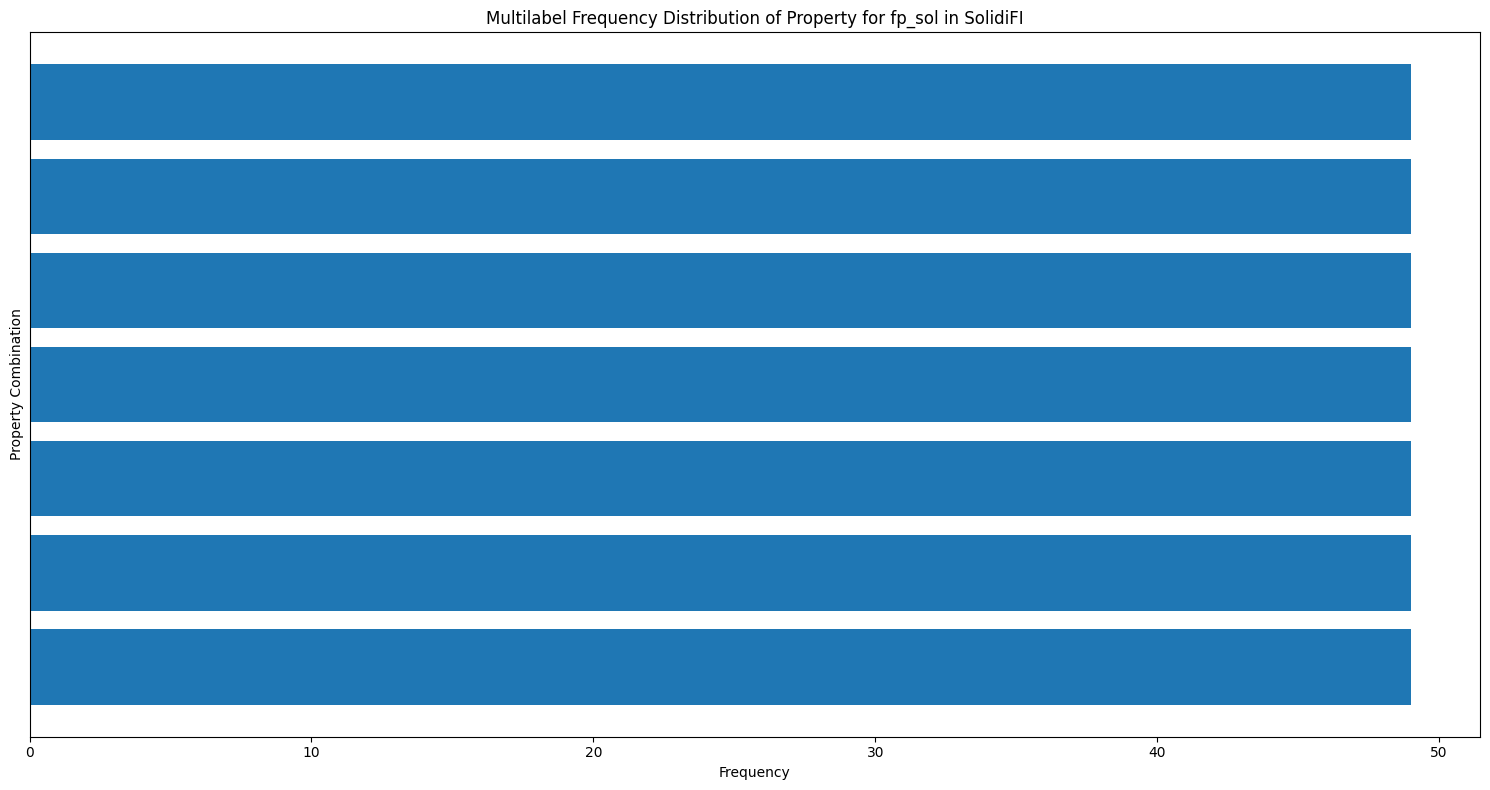

Statistics for dataset: SolidiFI and column: swc
       frequency
count        7.0
mean        49.0
std          0.0
min         49.0
25%         49.0
50%         49.0
75%         49.0
max         49.0
  swc_combination  frequency
0        (105.0,)         49
1        (115.0,)         49
2        (114.0,)         49
3        (101.0,)         49
4        (104.0,)         49
5        (116.0,)         49
6        (107.0,)         49


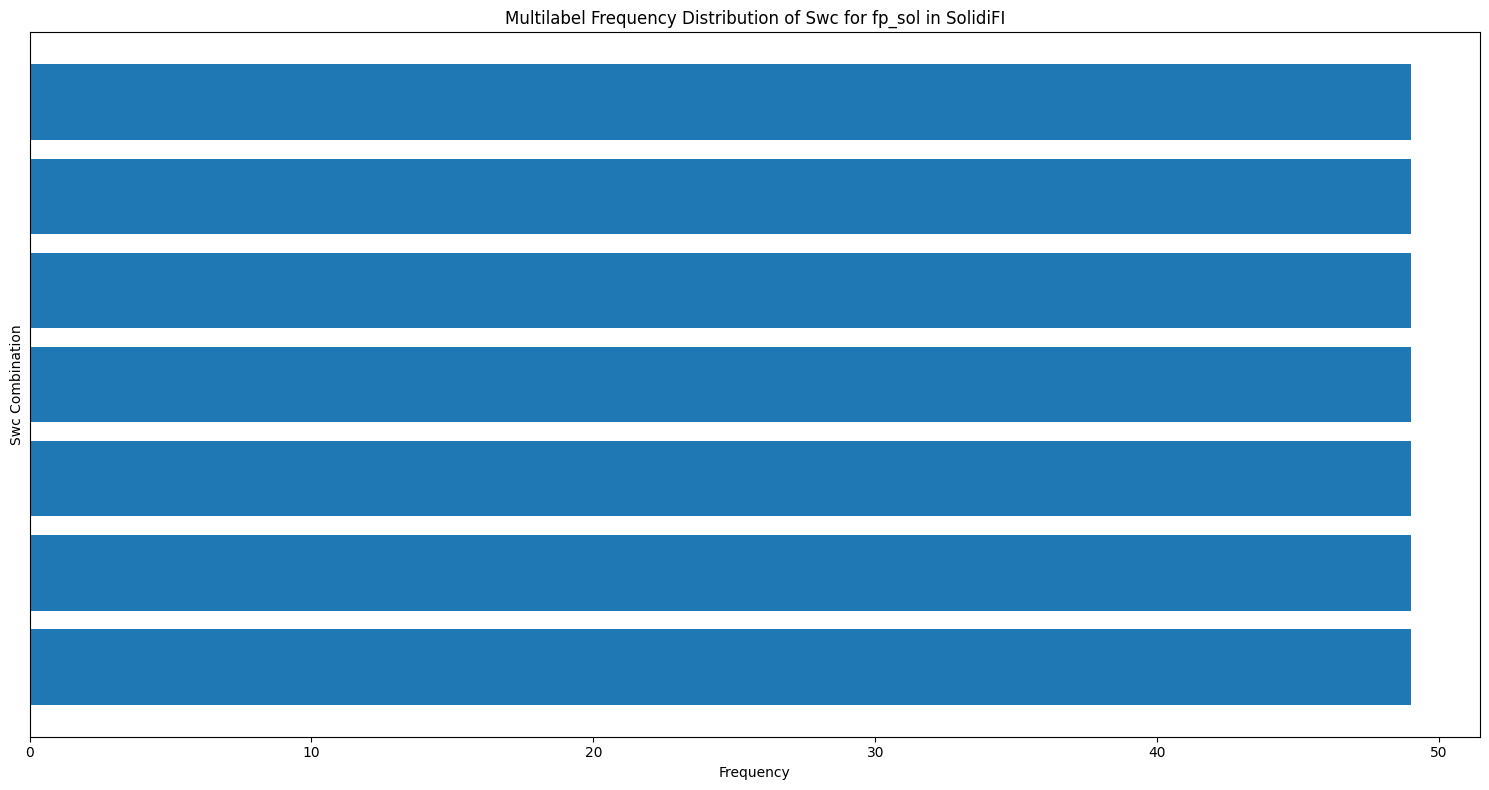

Statistics for dataset: SolidiFI and column: dasp
       frequency
count   6.000000
mean   57.166667
std    20.004166
min    49.000000
25%    49.000000
50%    49.000000
75%    49.000000
max    98.000000
  dasp_combination  frequency
0           (2.0,)         98
1           (7.0,)         49
2           (3.0,)         49
3           (4.0,)         49
4           (8.0,)         49
5           (1.0,)         49


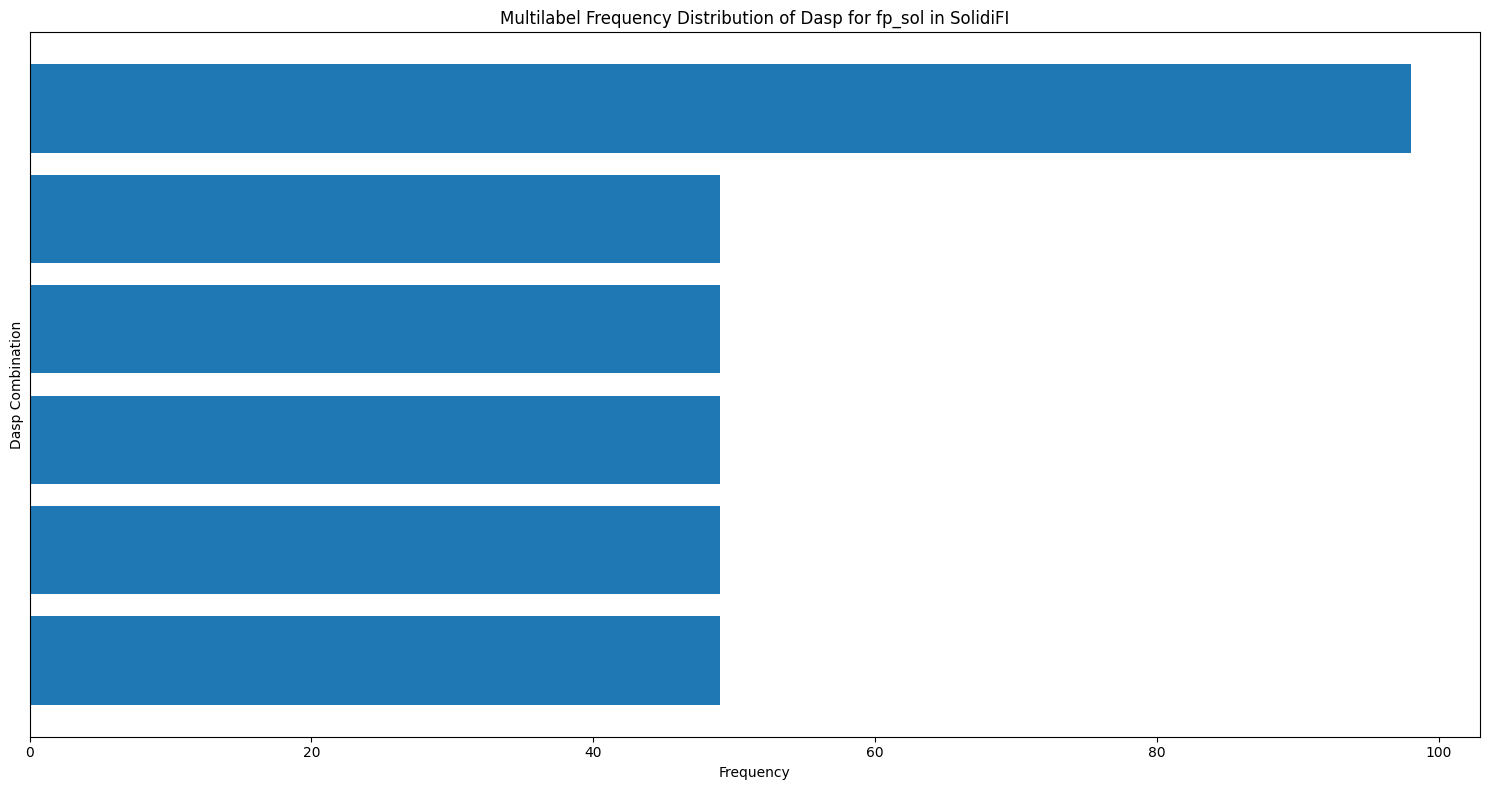

Statistics for dataset: ContractFuzzer and column: property
        frequency
count   12.000000
mean    29.333333
std     38.298667
min      1.000000
25%      2.000000
50%     10.500000
75%     38.500000
max    112.000000
                            property_combination  frequency
0                              (timedependency,)        112
1                            (numberdependency,)         79
2                              (freezing_ether,)         79
3                          (exception_disorder,)         25
4                      (delegatecall_dangerous,)         23
5                                  (reentrancy,)         11
6                                (gasless_send,)         10
7             (exception_disorder, gasless_send)          7
8           (exception_disorder, timedependency)          2
9             (numberdependency, timedependency)          2
10        (exception_disorder, numberdependency)          1
11  (delegatecall_dangerous, exception_disorder)          

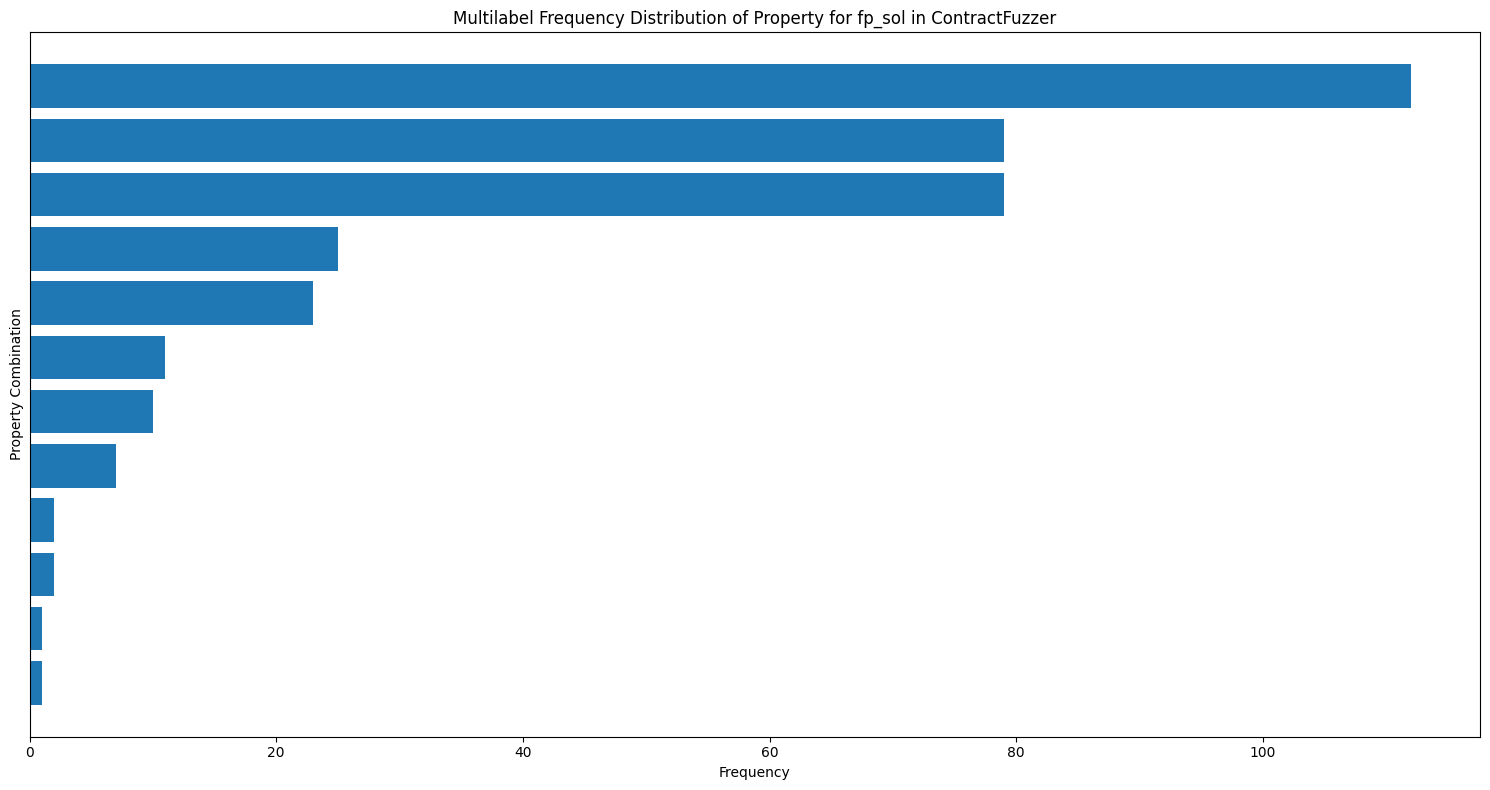

Statistics for dataset: ContractFuzzer and column: swc
        frequency
count   12.000000
mean    29.333333
std     38.298667
min      1.000000
25%      2.000000
50%     10.500000
75%     38.500000
max    112.000000
   swc_combination  frequency
0         (116.0,)        112
1         (120.0,)         79
2         (997.0,)         79
3         (104.0,)         25
4         (112.0,)         23
5         (107.0,)         11
6         (134.0,)         10
7   (104.0, 134.0)          7
8   (104.0, 116.0)          2
9   (116.0, 120.0)          2
10  (104.0, 120.0)          1
11  (104.0, 112.0)          1


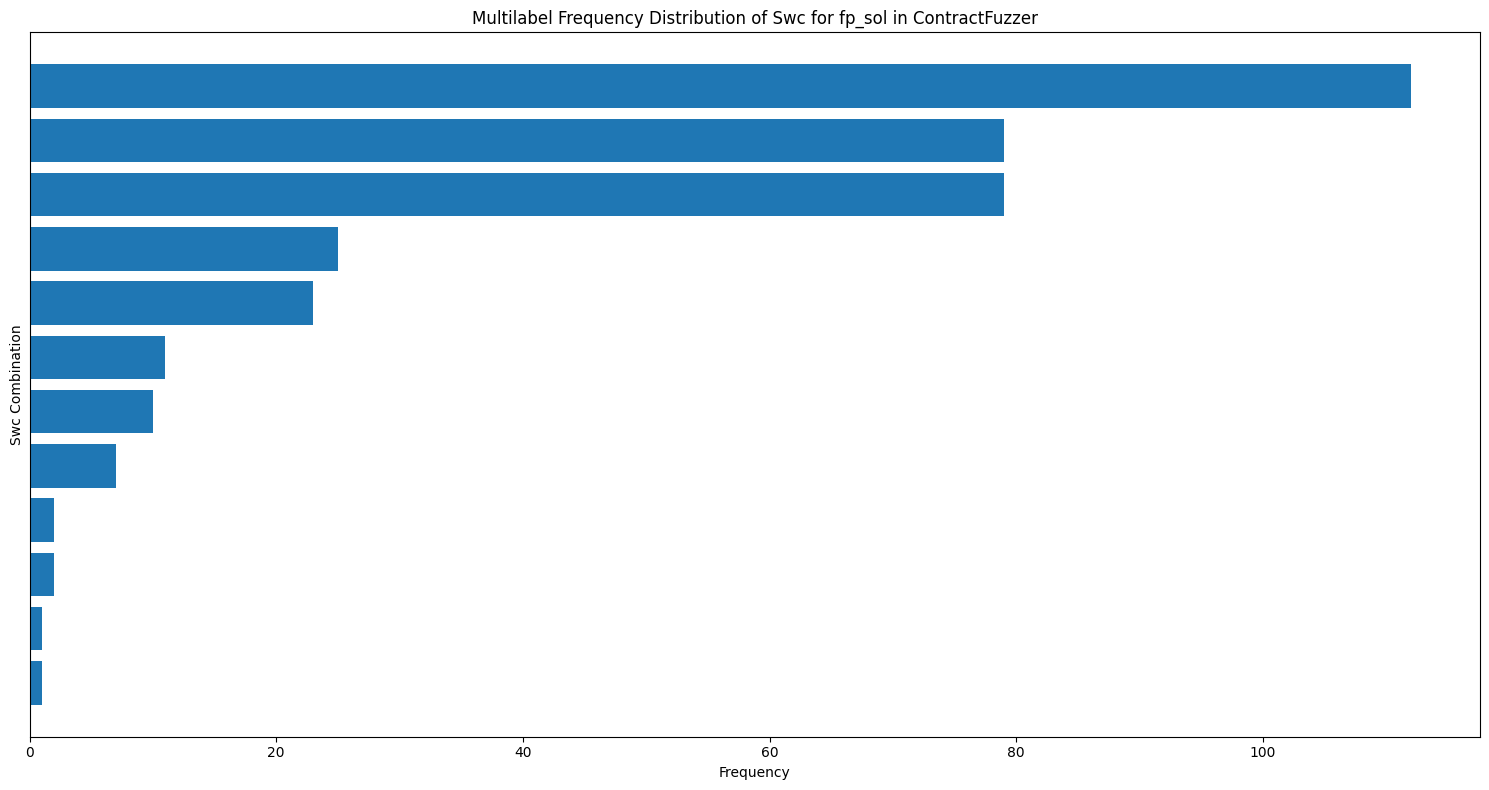

Statistics for dataset: ContractFuzzer and column: dasp
        frequency
count   12.000000
mean    29.333333
std     38.298667
min      1.000000
25%      2.000000
50%     10.500000
75%     38.500000
max    112.000000
   dasp_combination  frequency
0            (8.0,)        112
1            (6.0,)         79
2            (nan,)         79
3            (4.0,)         25
4            (2.0,)         23
5            (1.0,)         11
6            (5.0,)         10
7        (4.0, 5.0)          7
8        (4.0, 8.0)          2
9        (6.0, 8.0)          2
10       (4.0, 6.0)          1
11       (2.0, 4.0)          1


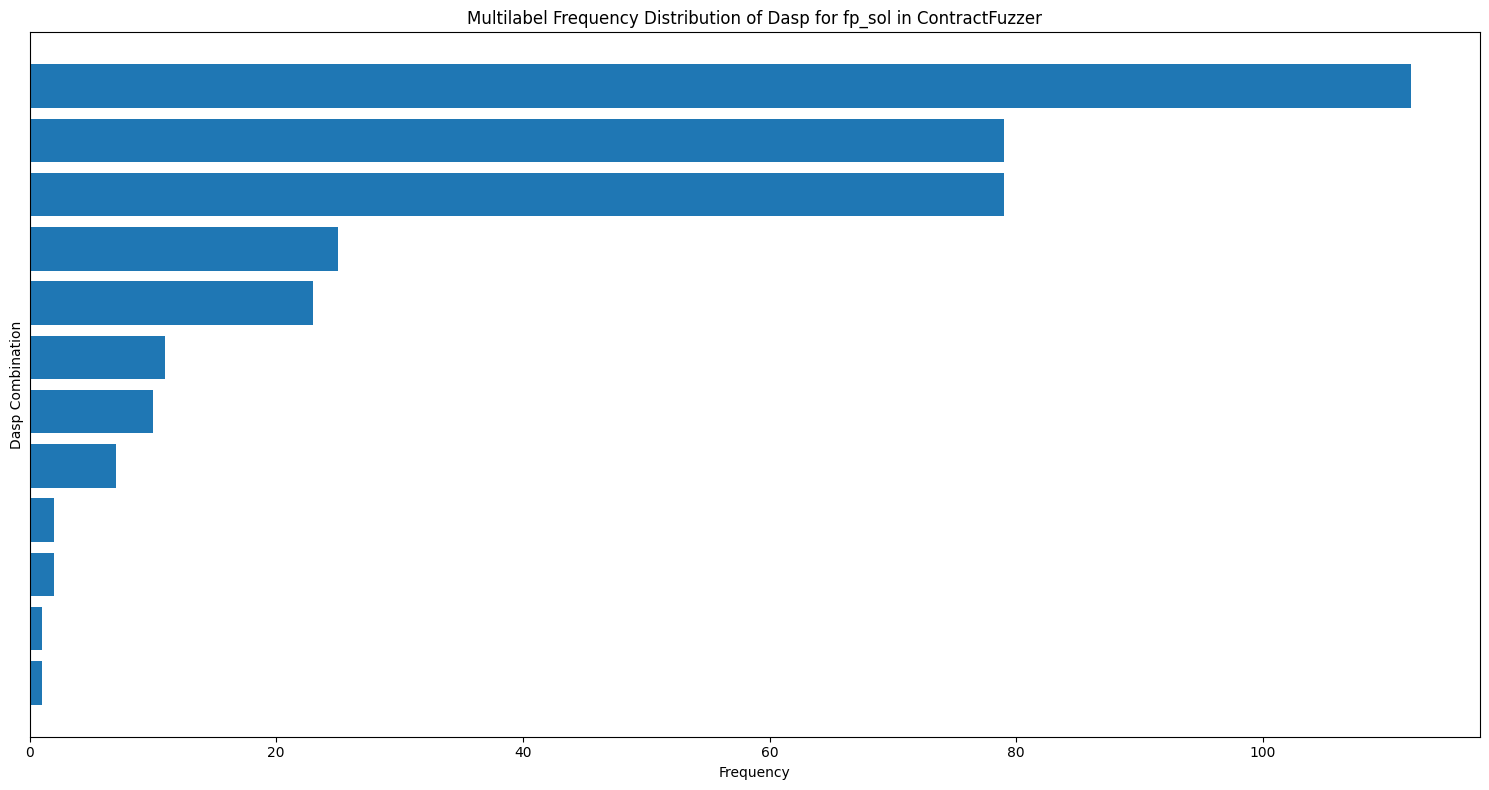

Statistics for dataset: SBcurated and column: property
       frequency
count   18.00000
mean     7.00000
std     10.73751
min      1.00000
25%      2.00000
50%      3.00000
75%      5.00000
max     45.00000
                        property_combination  frequency
0               (unchecked_low_level_calls,)         45
1                              (reentrancy,)         20
2                              (arithmetic,)         15
3                          (bad_randomness,)          8
4                       (time_manipulation,)          5
5                      (access_control-105,)          5
6                           (front_running,)          4
7                   (denial_of_service-128,)          4
8                               (other-109,)          3
9                      (access_control-124,)          3
10                     (access_control-118,)          3
11                     (access_control-115,)          2
12                     (access_control-112,)          2
13      

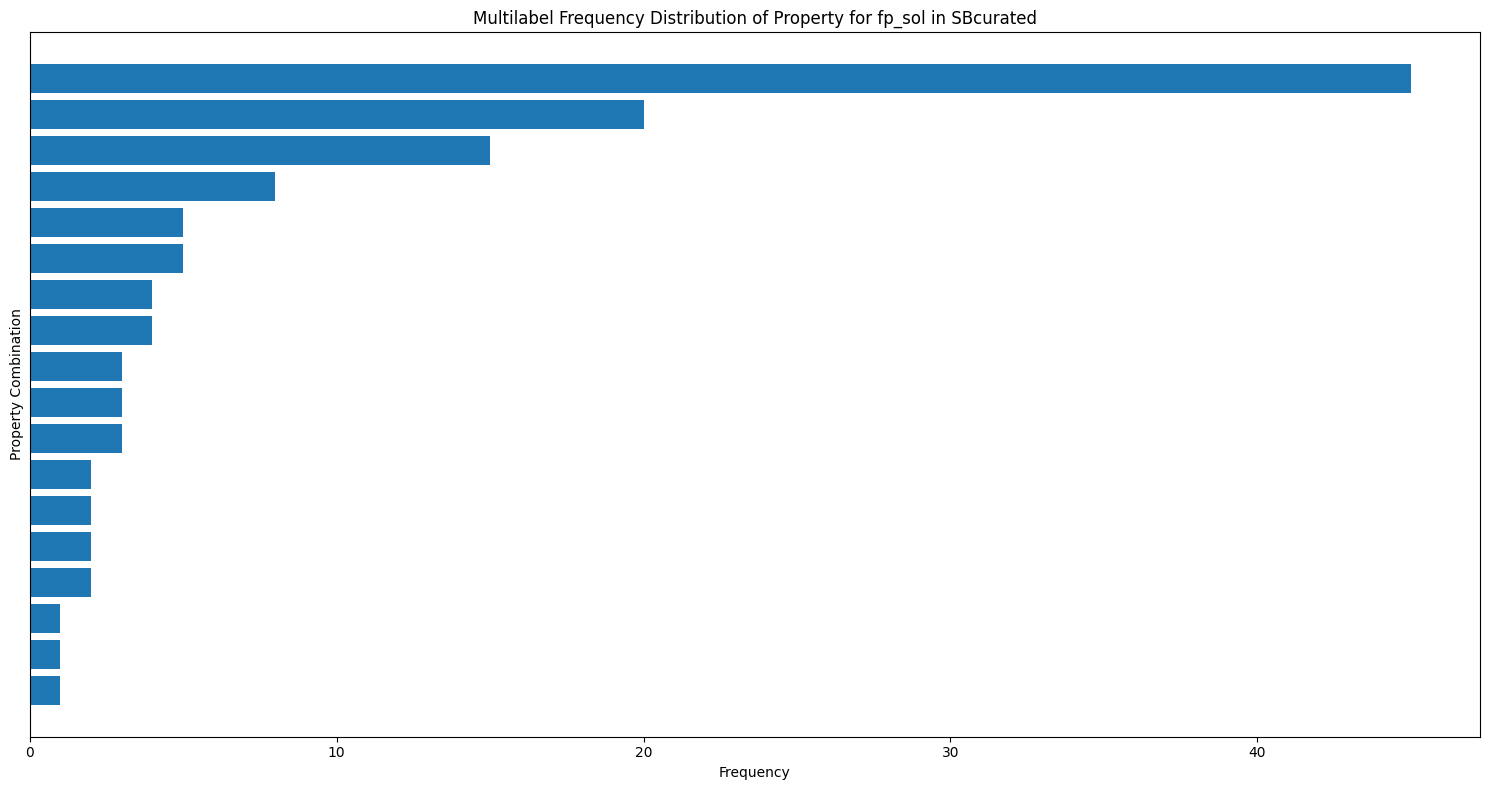

Statistics for dataset: SBcurated and column: swc
       frequency
count   18.00000
mean     7.00000
std     10.73751
min      1.00000
25%      2.00000
50%      3.00000
75%      5.00000
max     45.00000
   swc_combination  frequency
0         (104.0,)         45
1         (107.0,)         20
2         (101.0,)         15
3         (120.0,)          8
4         (116.0,)          5
5         (105.0,)          5
6         (114.0,)          4
7         (128.0,)          4
8         (109.0,)          3
9         (124.0,)          3
10        (118.0,)          3
11        (115.0,)          2
12        (112.0,)          2
13        (113.0,)          2
14  (106.0, 124.0)          2
15        (995.0,)          1
16        (106.0,)          1
17  (104.0, 107.0)          1


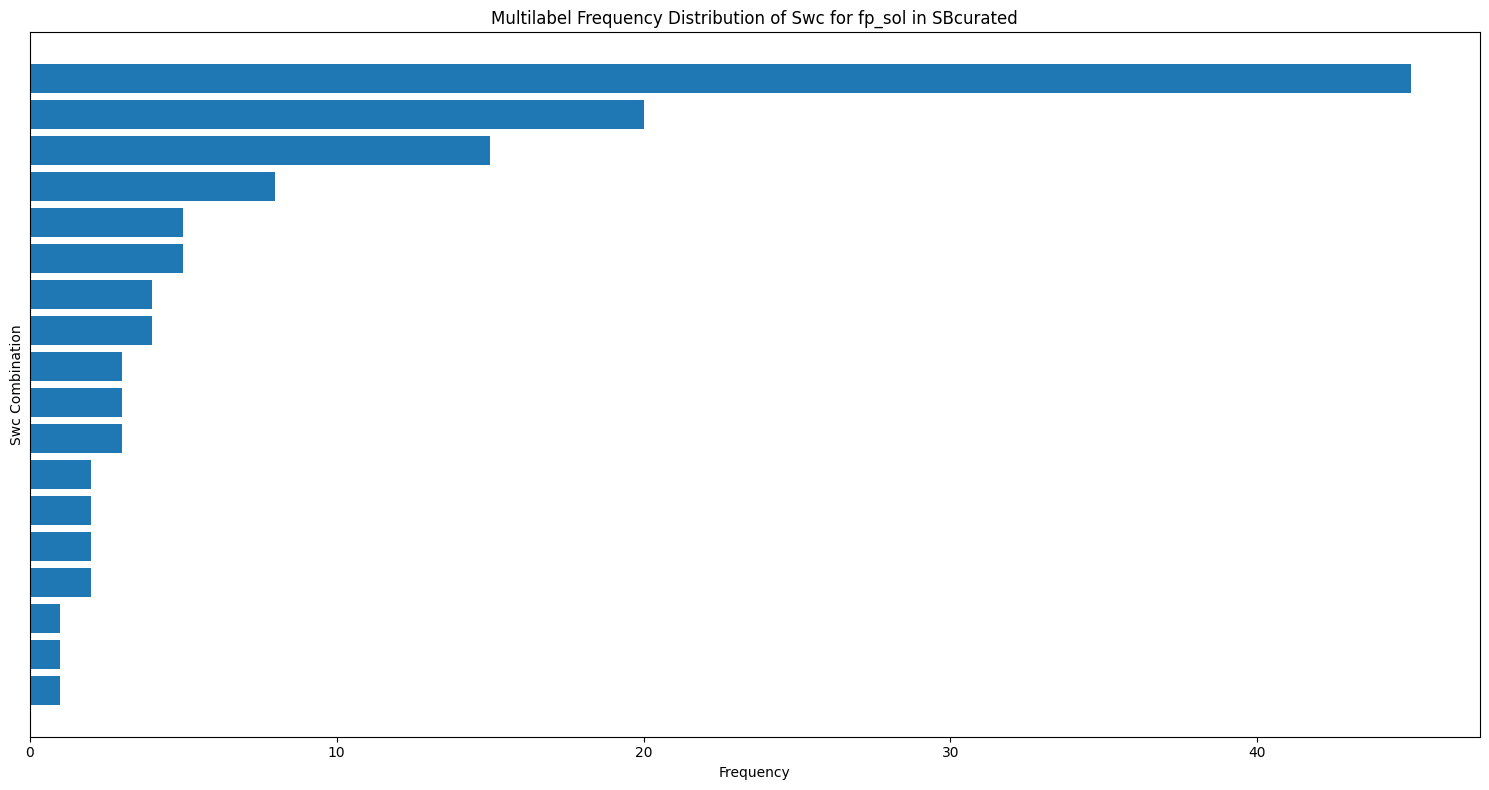

Statistics for dataset: SBcurated and column: dasp
       frequency
count  11.000000
mean   11.454545
std    12.971998
min     1.000000
25%     3.500000
50%     6.000000
75%    16.500000
max    45.000000
   dasp_combination  frequency
0            (4.0,)         45
1            (1.0,)         20
2            (2.0,)         18
3            (3.0,)         15
4            (6.0,)          8
5            (5.0,)          6
6            (8.0,)          5
7            (7.0,)          4
8            (nan,)          3
9            (9.0,)          1
10       (1.0, 4.0)          1


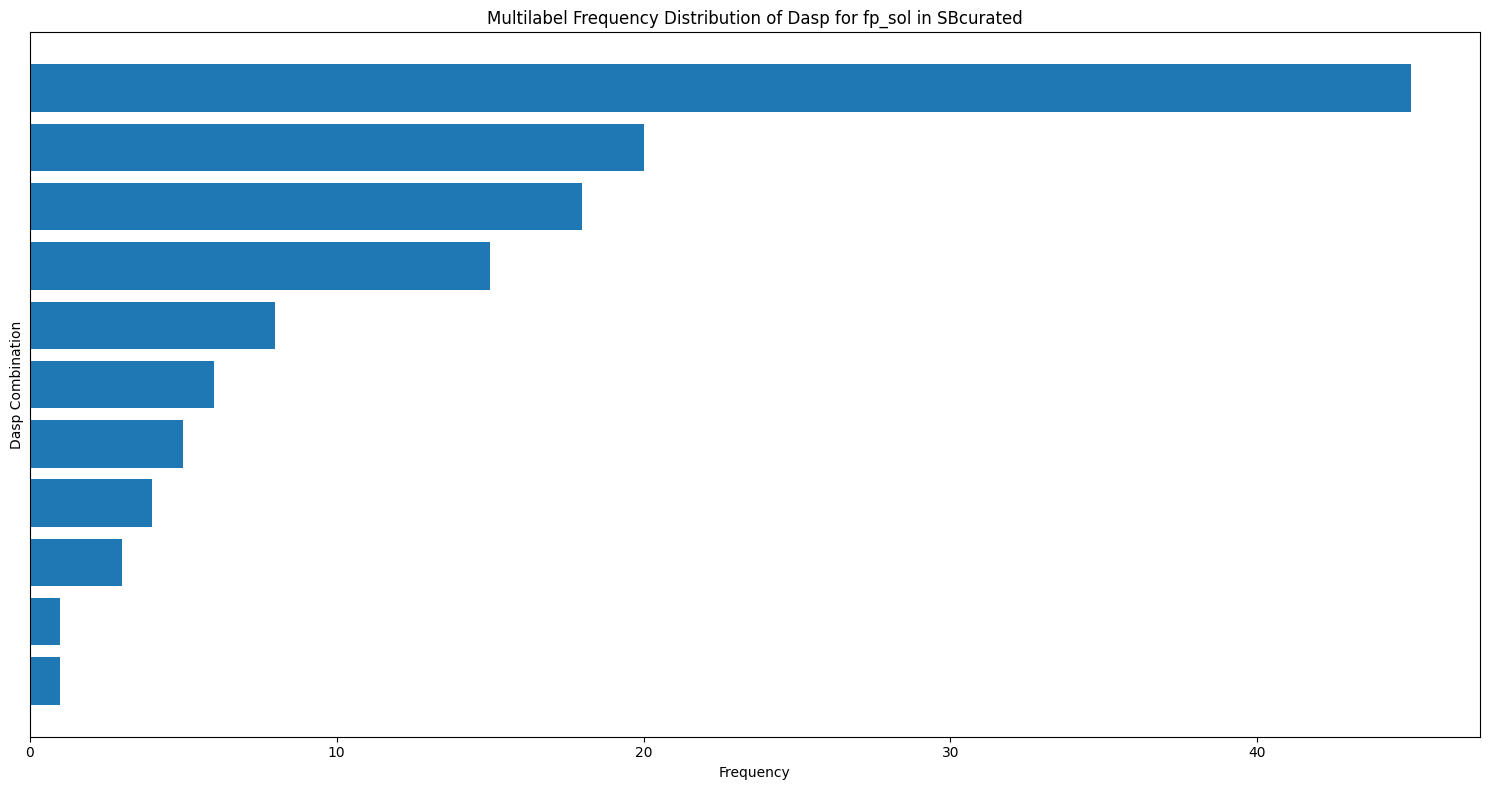

Statistics for dataset: JiuZhou and column: property
       frequency
count  52.000000
mean    1.288462
std     0.636675
min     1.000000
25%     1.000000
50%     1.000000
75%     1.000000
max     4.000000
                                 property_combination  frequency
0                                  (DOS by gaslimit,)          4
1                        (Re-entrancy vulnerability,)          3
2          (DOS by non-existent address or contract,)          3
3                                    (Replay attack,)          2
4                      (Unlimited compiler versions,)          2
5                 (Write the wrong constructor name,)          2
6                   (integer overflow and underflow,)          2
7                      (Nonstandard token interface,)          2
8                        (Implicit visibility level,)          2
9                          (Time affected by miners,)          2
10  (The call address or data are externally contr...          2
11            

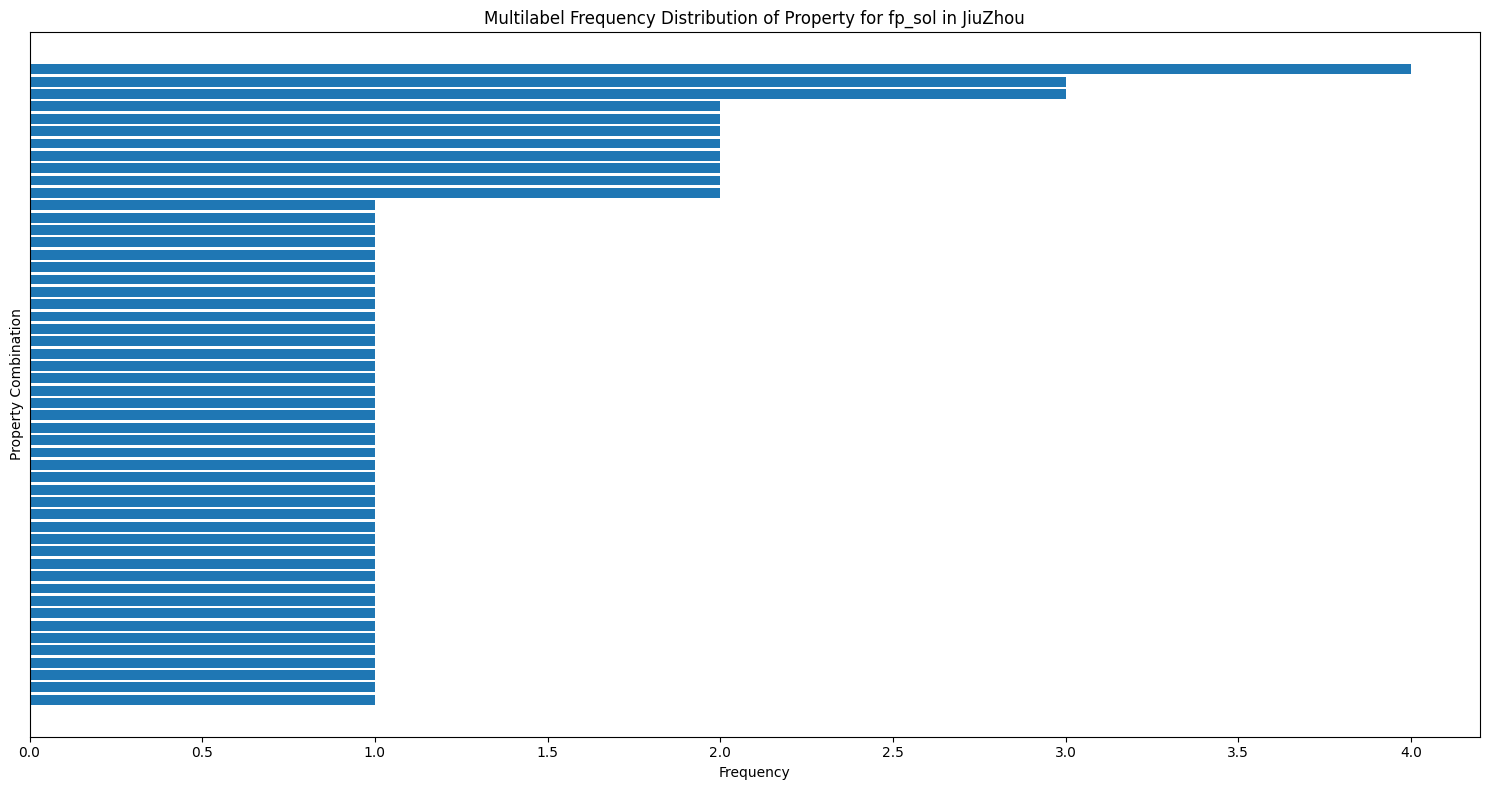

Statistics for dataset: JiuZhou and column: swc
       frequency
count  34.000000
mean    1.970588
std     2.430679
min     1.000000
25%     1.000000
50%     1.000000
75%     2.000000
max    15.000000
   swc_combination  frequency
0           (nan,)         15
1         (128.0,)          4
2         (999.0,)          3
3         (107.0,)          3
4         (113.0,)          3
5         (101.0,)          2
6         (118.0,)          2
7         (103.0,)          2
8         (117.0,)          2
9         (132.0,)          2
10        (108.0,)          2
11        (112.0,)          2
12        (109.0,)          2
13        (136.0,)          2
14        (116.0,)          2
15        (114.0,)          1
16        (110.0,)          1
17        (115.0,)          1
18        (124.0,)          1
19        (104.0,)          1
20        (129.0,)          1
21        (123.0,)          1
22        (105.0,)          1
23        (120.0,)          1
24        (111.0,)          1
25        (127.0,) 

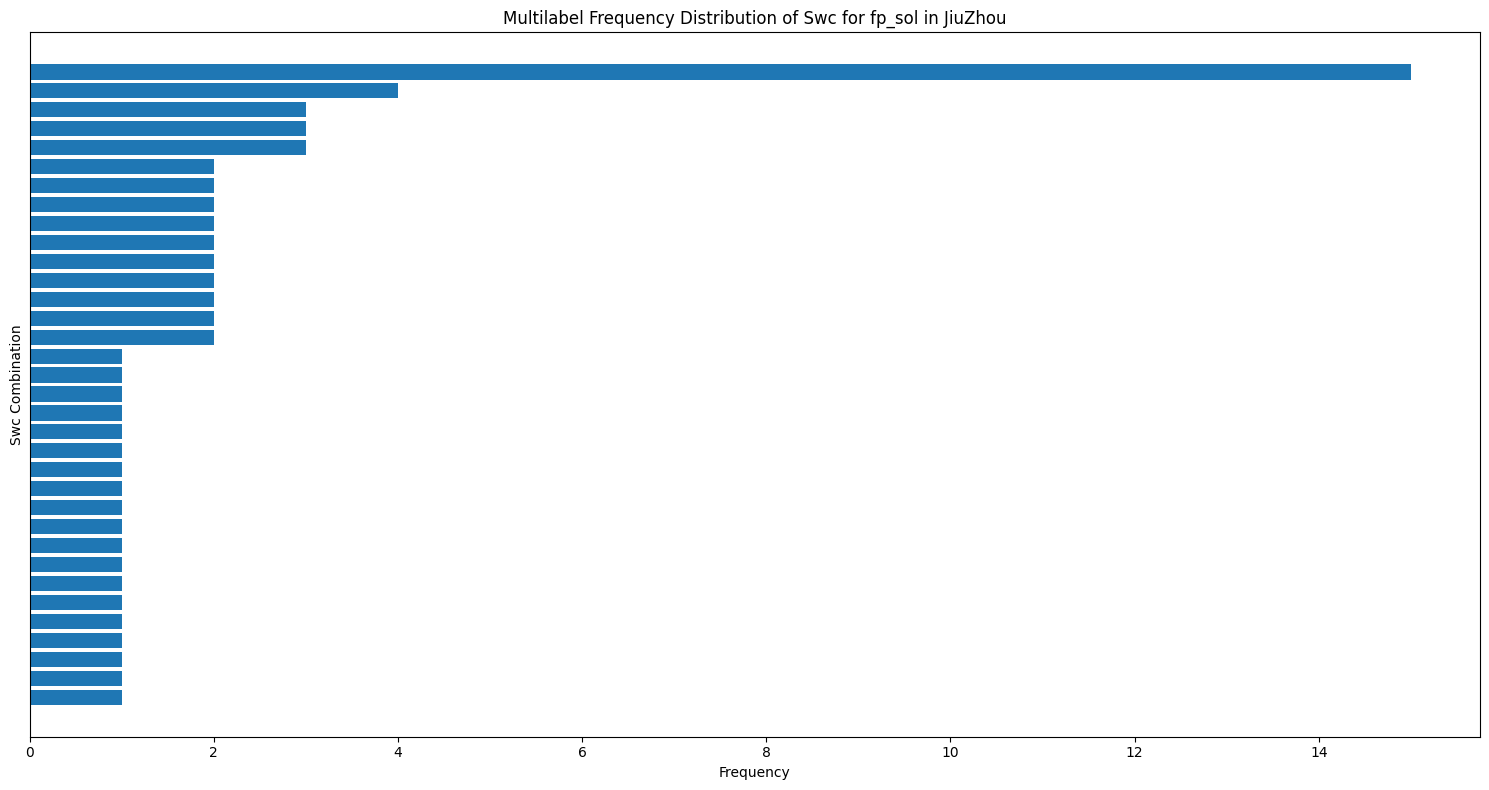

Statistics for dataset: JiuZhou and column: dasp
       frequency
count  10.000000
mean    6.700000
std    10.446158
min     1.000000
25%     1.000000
50%     2.500000
75%     7.250000
max    35.000000
  dasp_combination  frequency
0           (nan,)         35
1           (2.0,)         10
2           (5.0,)          8
3           (3.0,)          5
4           (1.0,)          3
5           (8.0,)          2
6           (9.0,)          1
7           (6.0,)          1
8           (7.0,)          1
9           (4.0,)          1


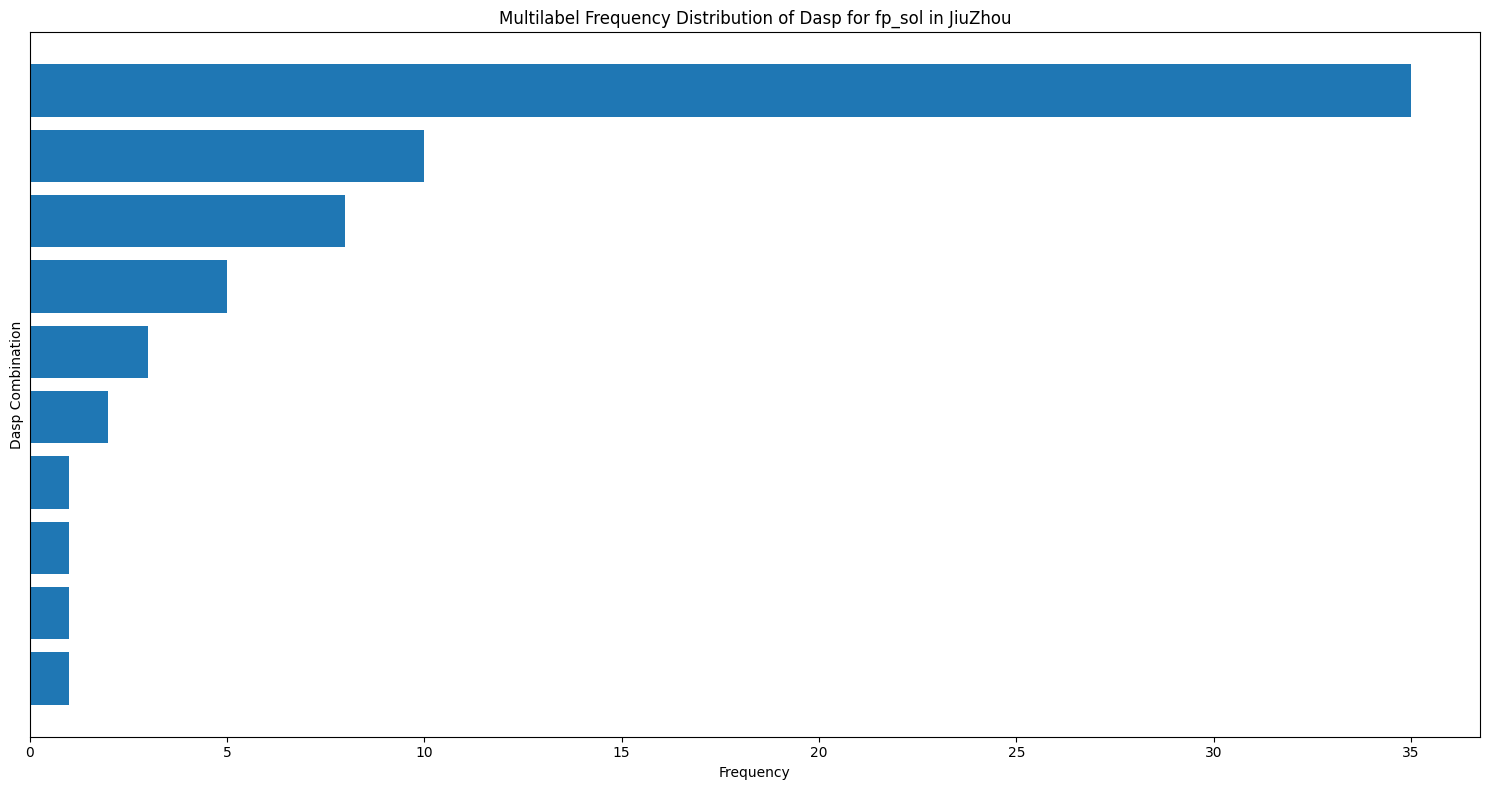

Statistics for dataset: Doublade and column: property
       frequency
count   8.000000
mean   13.625000
std    15.174579
min     1.000000
25%     4.250000
50%     8.000000
75%    16.750000
max    46.000000
                    property_combination  frequency
0                 (lowlevelcall_result,)         46
1             (unexpectedrevert_result,)         25
2                          (reentrancy,)         14
3                           (tx_result,)          9
4                 (selfdestruct_result,)          7
5       (lowlevelcall_result, tx_result)          5
6                (reentrancy, tx_result)          2
7  (reentrancy, unexpectedrevert_result)          1


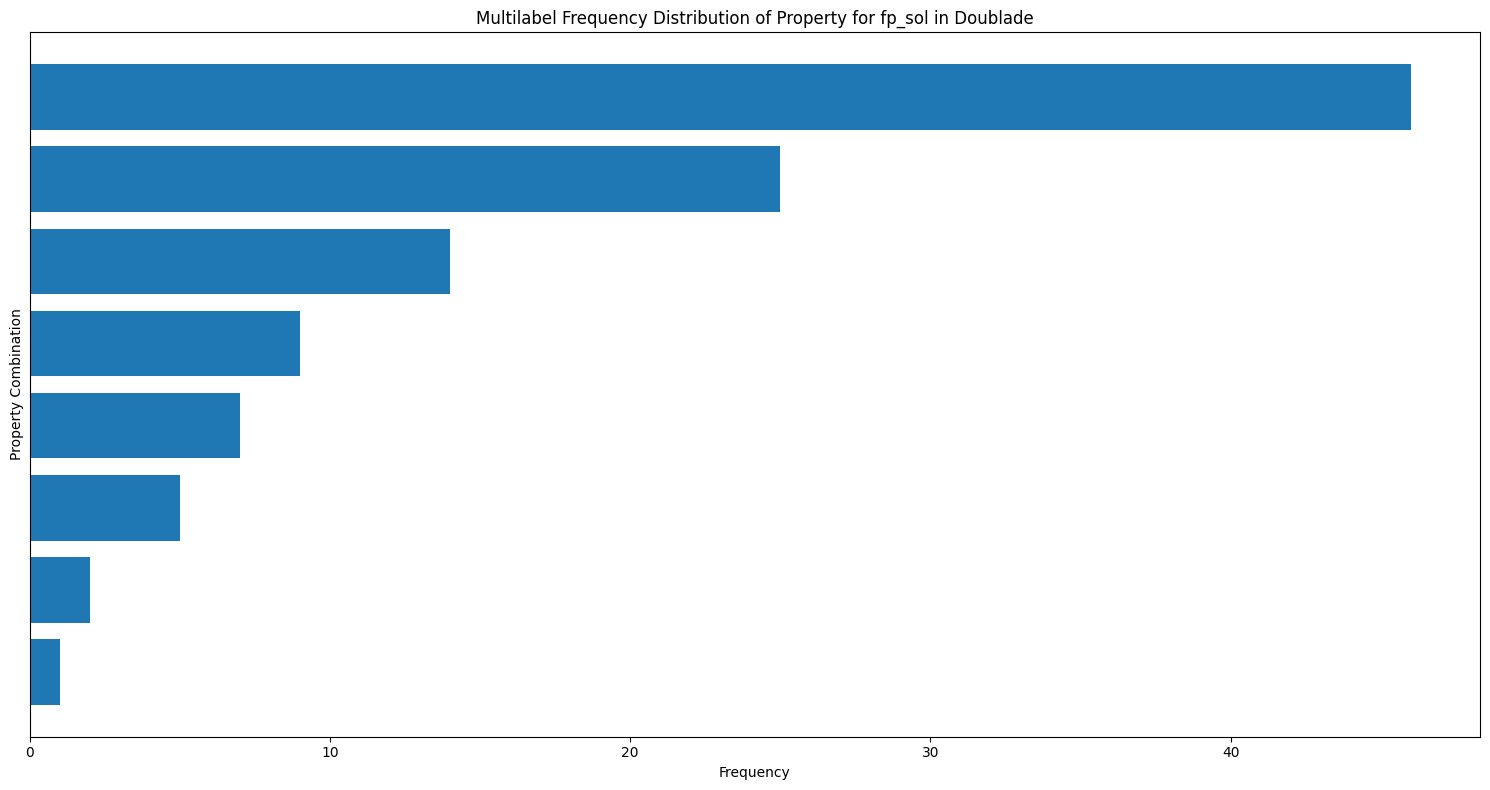

Statistics for dataset: Doublade and column: swc
       frequency
count   8.000000
mean   13.625000
std    15.174579
min     1.000000
25%     4.250000
50%     8.000000
75%    16.750000
max    46.000000
  swc_combination  frequency
0        (104.0,)         46
1        (113.0,)         25
2        (107.0,)         14
3        (115.0,)          9
4        (132.0,)          7
5  (104.0, 115.0)          5
6  (107.0, 115.0)          2
7  (107.0, 113.0)          1


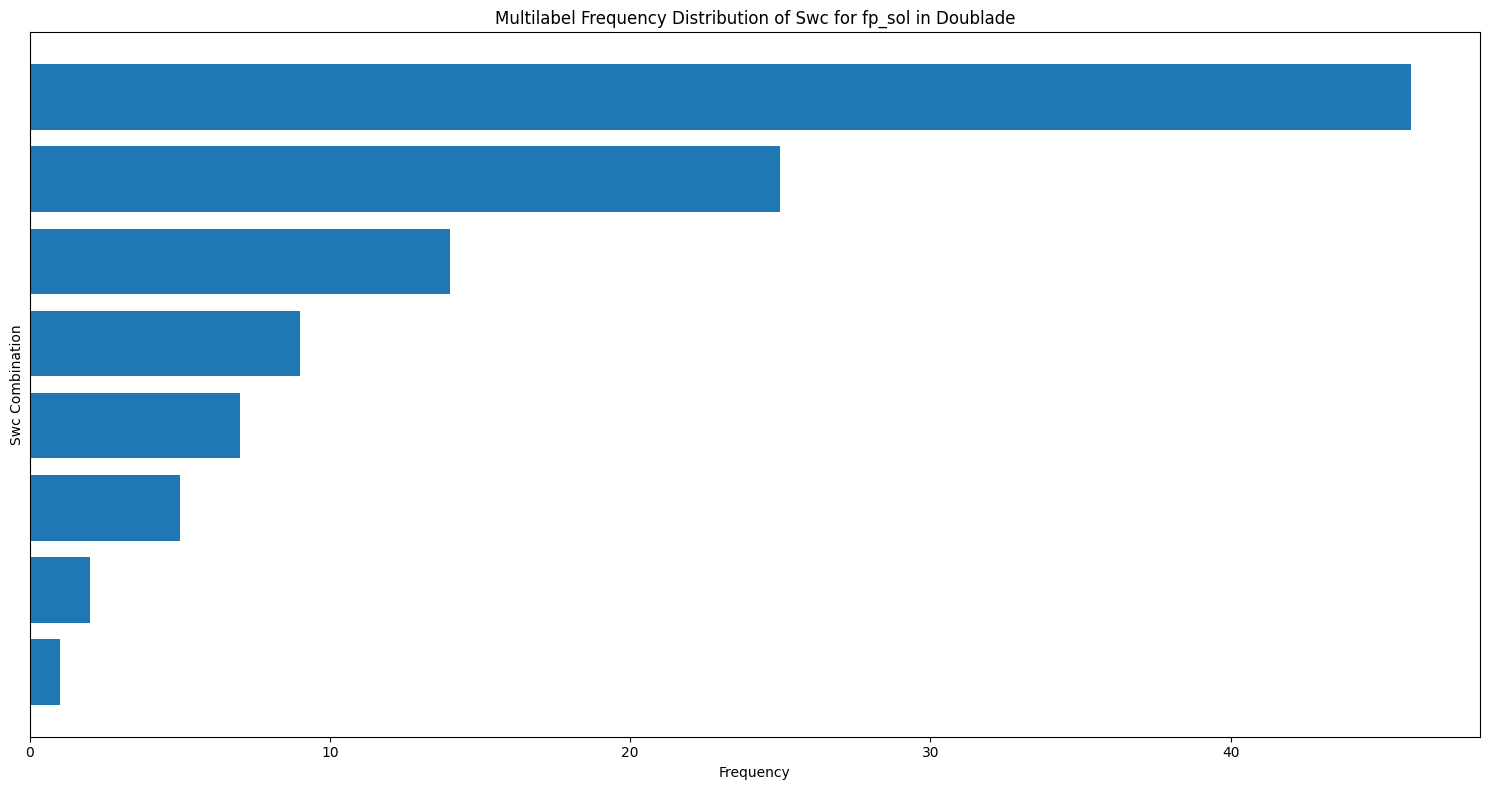

Statistics for dataset: Doublade and column: dasp
       frequency
count   8.000000
mean   13.625000
std    15.174579
min     1.000000
25%     4.250000
50%     8.000000
75%    16.750000
max    46.000000
  dasp_combination  frequency
0           (4.0,)         46
1           (5.0,)         25
2           (1.0,)         14
3           (2.0,)          9
4           (nan,)          7
5       (2.0, 4.0)          5
6       (1.0, 2.0)          2
7       (1.0, 5.0)          1


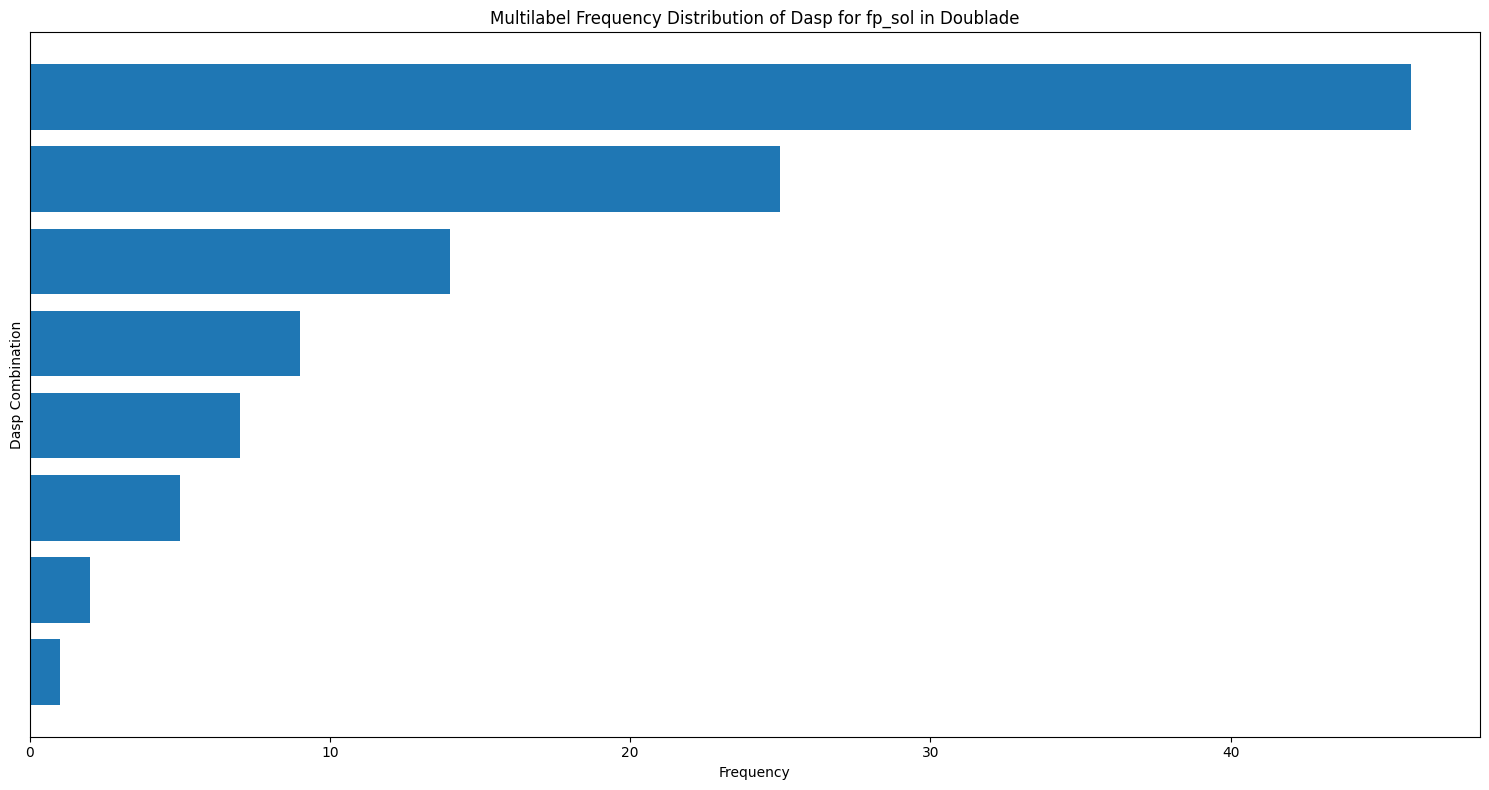

Statistics for dataset: SWCregistry and column: property
       frequency
count  33.000000
mean    2.303030
std     2.579787
min     1.000000
25%     1.000000
50%     1.000000
75%     2.000000
max    14.000000
   property_combination  frequency
0            (SWC-110,)         14
1            (SWC-101,)          7
2            (SWC-105,)          7
3            (SWC-120,)          3
4            (SWC-129,)          3
5            (SWC-106,)          3
6            (SWC-128,)          3
7            (SWC-103,)          3
8            (SWC-131,)          2
9            (SWC-119,)          2
10           (SWC-118,)          2
11           (SWC-135,)          2
12           (SWC-107,)          2
13           (SWC-124,)          2
14           (SWC-116,)          2
15           (SWC-114,)          2
16           (SWC-111,)          1
17           (SWC-115,)          1
18           (SWC-125,)          1
19           (SWC-100,)          1
20           (SWC-133,)          1
21           (SWC-11

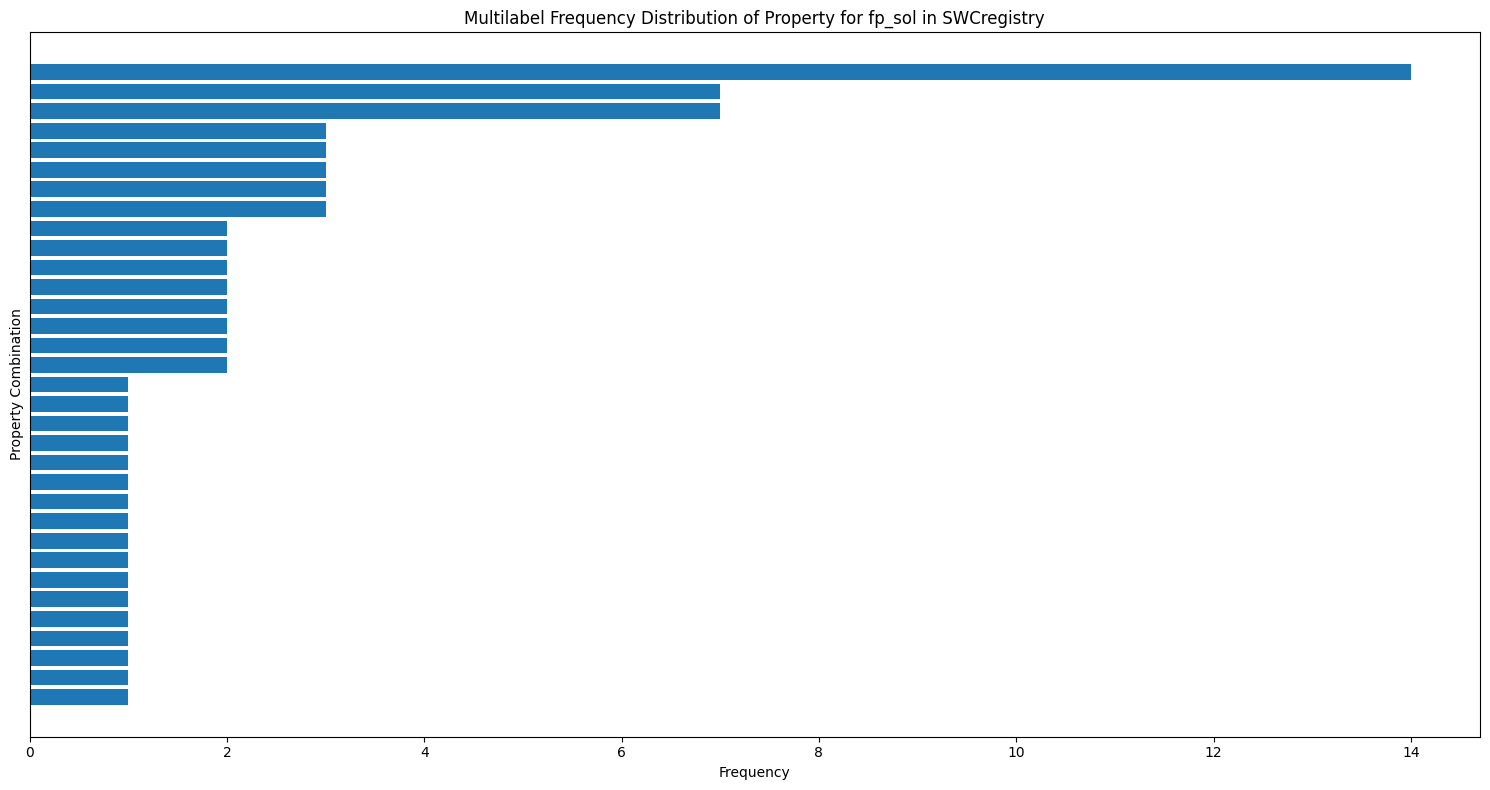

Statistics for dataset: SWCregistry and column: swc
       frequency
count  33.000000
mean    2.303030
std     2.579787
min     1.000000
25%     1.000000
50%     1.000000
75%     2.000000
max    14.000000
   swc_combination  frequency
0         (110.0,)         14
1         (101.0,)          7
2         (105.0,)          7
3         (120.0,)          3
4         (129.0,)          3
5         (106.0,)          3
6         (128.0,)          3
7         (103.0,)          3
8         (131.0,)          2
9         (119.0,)          2
10        (118.0,)          2
11        (135.0,)          2
12        (107.0,)          2
13        (124.0,)          2
14        (116.0,)          2
15        (114.0,)          2
16        (111.0,)          1
17        (115.0,)          1
18        (125.0,)          1
19        (100.0,)          1
20        (133.0,)          1
21        (117.0,)          1
22        (113.0,)          1
23        (108.0,)          1
24        (136.0,)          1
25        (104.

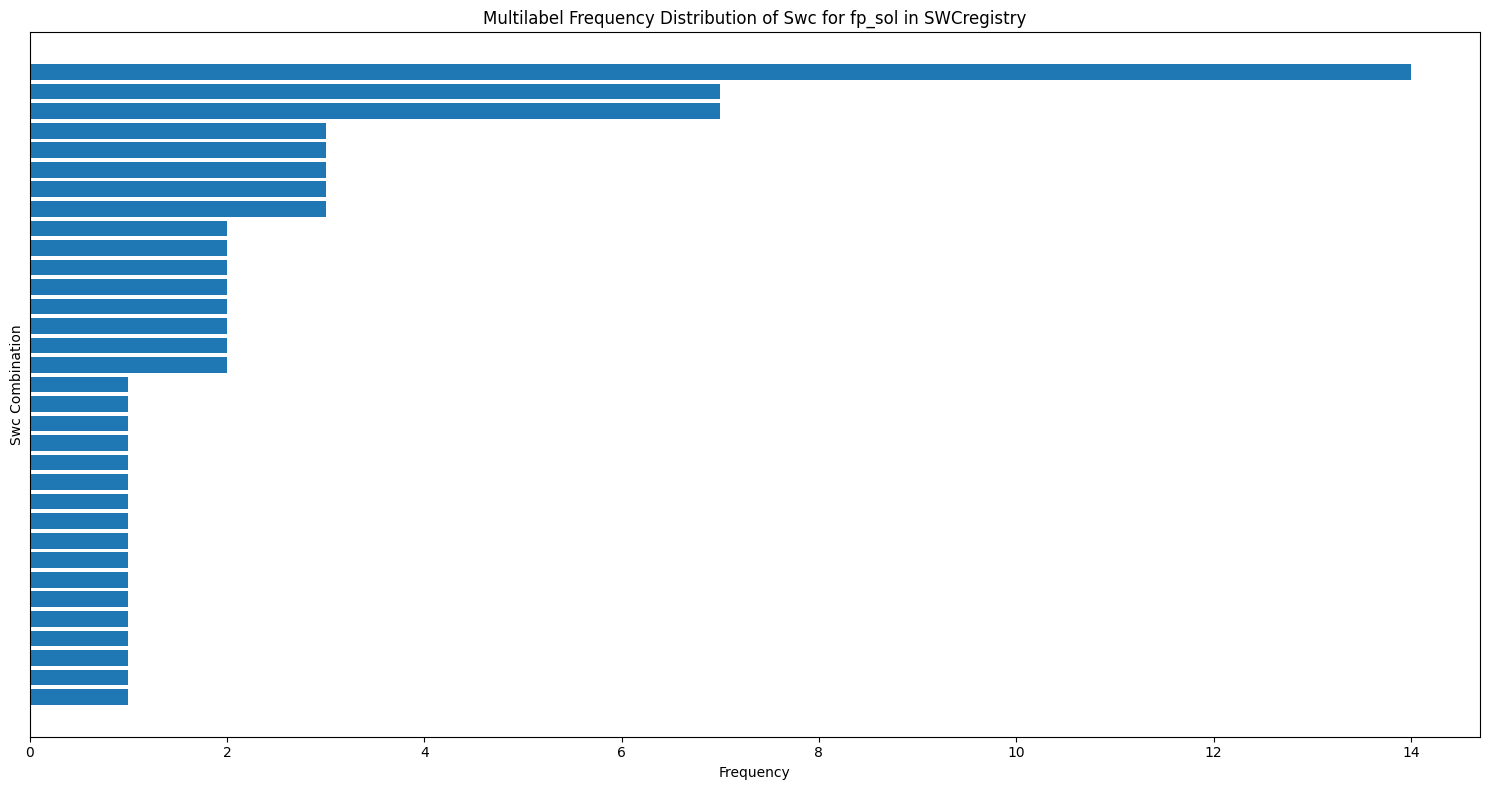

Statistics for dataset: SWCregistry and column: dasp
       frequency
count   9.000000
mean    8.444444
std    11.791004
min     1.000000
25%     2.000000
50%     3.000000
75%     7.000000
max    37.000000
  dasp_combination  frequency
0           (nan,)         37
1           (2.0,)         17
2           (3.0,)          7
3           (5.0,)          5
4           (6.0,)          3
5           (7.0,)          2
6           (8.0,)          2
7           (1.0,)          2
8           (4.0,)          1


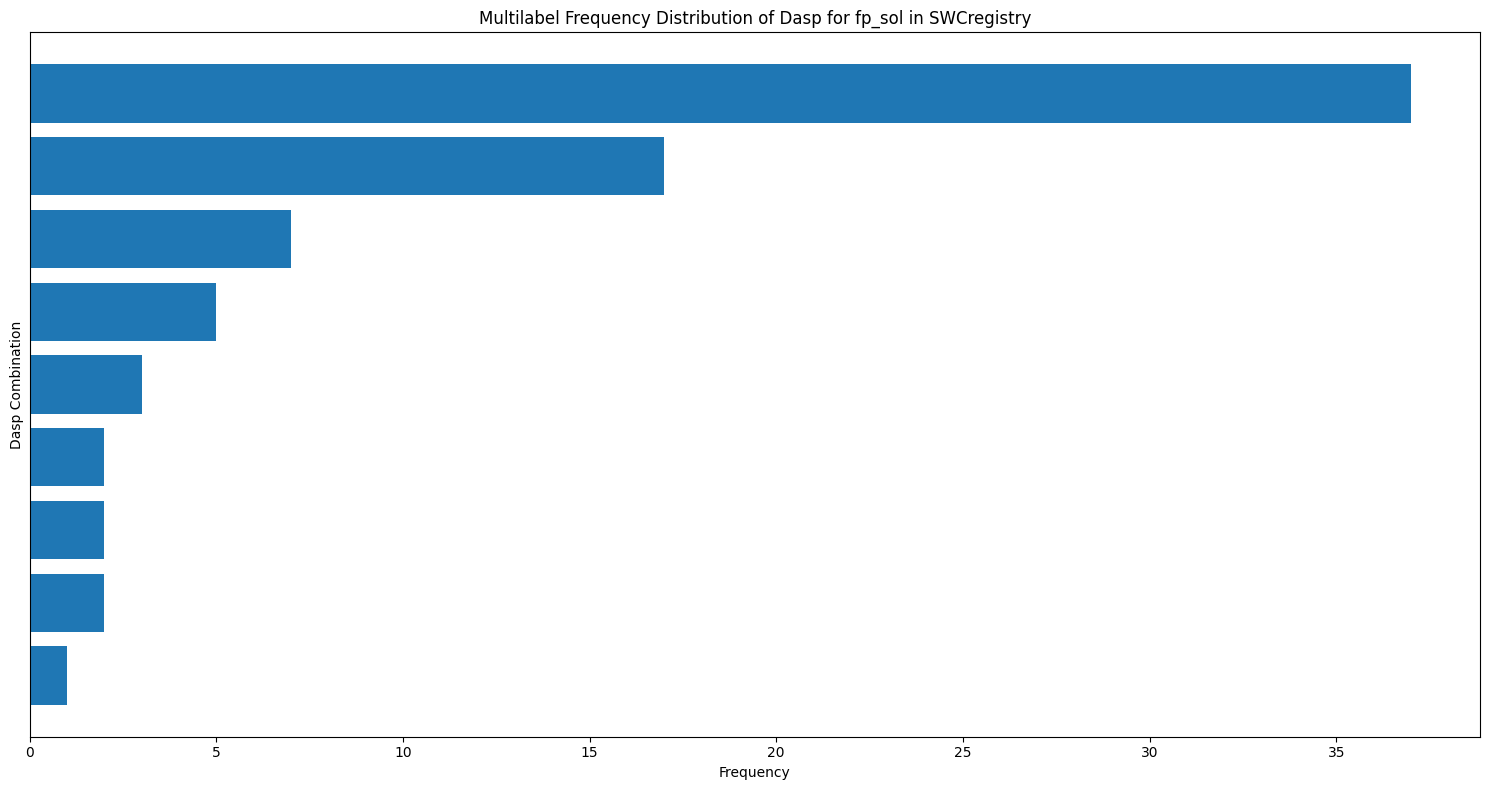

Statistics for dataset: EthRacer and column: property
       frequency
count   2.000000
mean   32.000000
std    16.970563
min    20.000000
25%    26.000000
50%    32.000000
75%    38.000000
max    44.000000
  property_combination  frequency
0        (EO onchain,)         44
1       (EO offchain,)         20


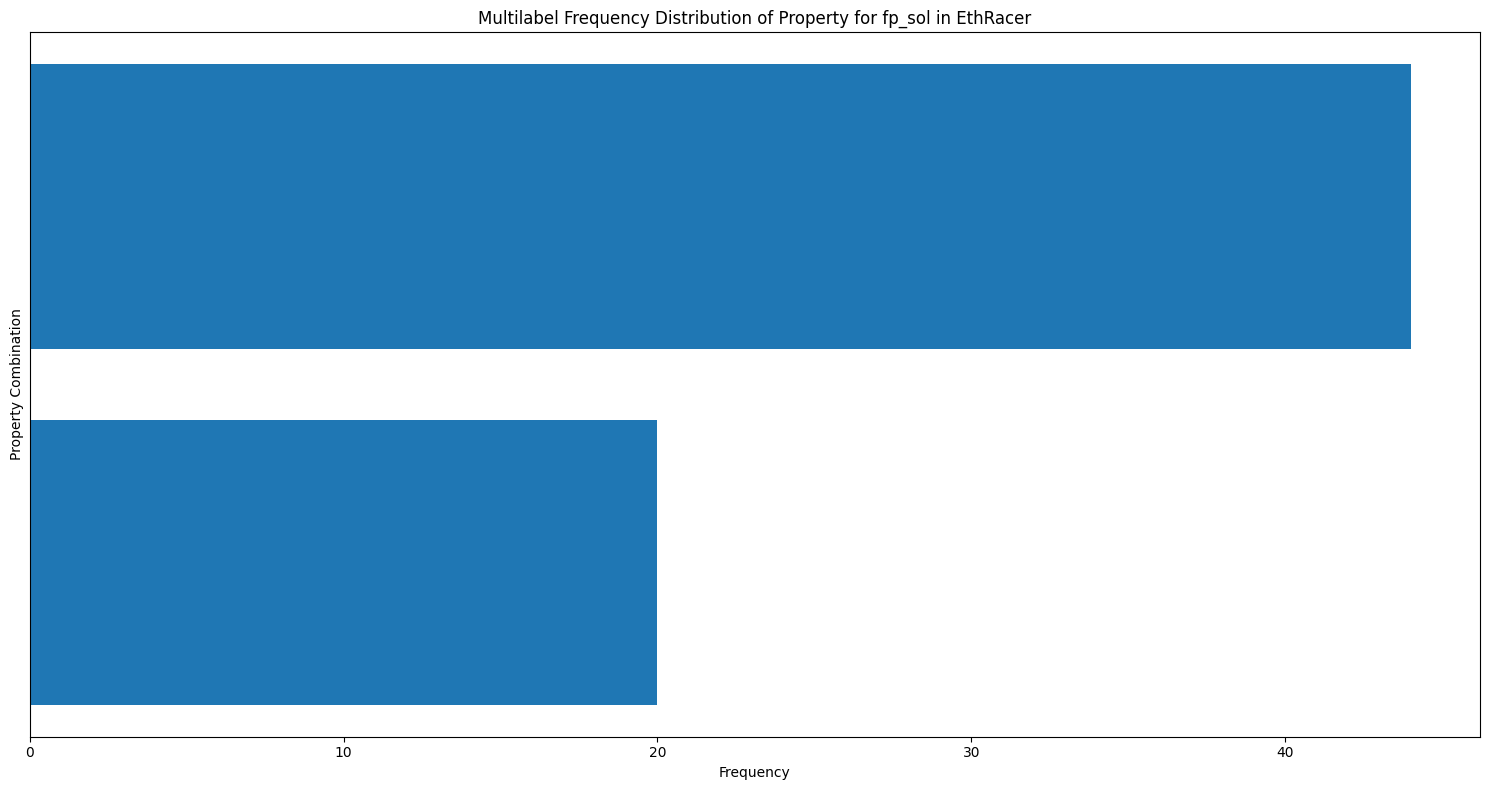

Statistics for dataset: EthRacer and column: swc
       frequency
count        1.0
mean        64.0
std          NaN
min         64.0
25%         64.0
50%         64.0
75%         64.0
max         64.0
  swc_combination  frequency
0        (114.0,)         64


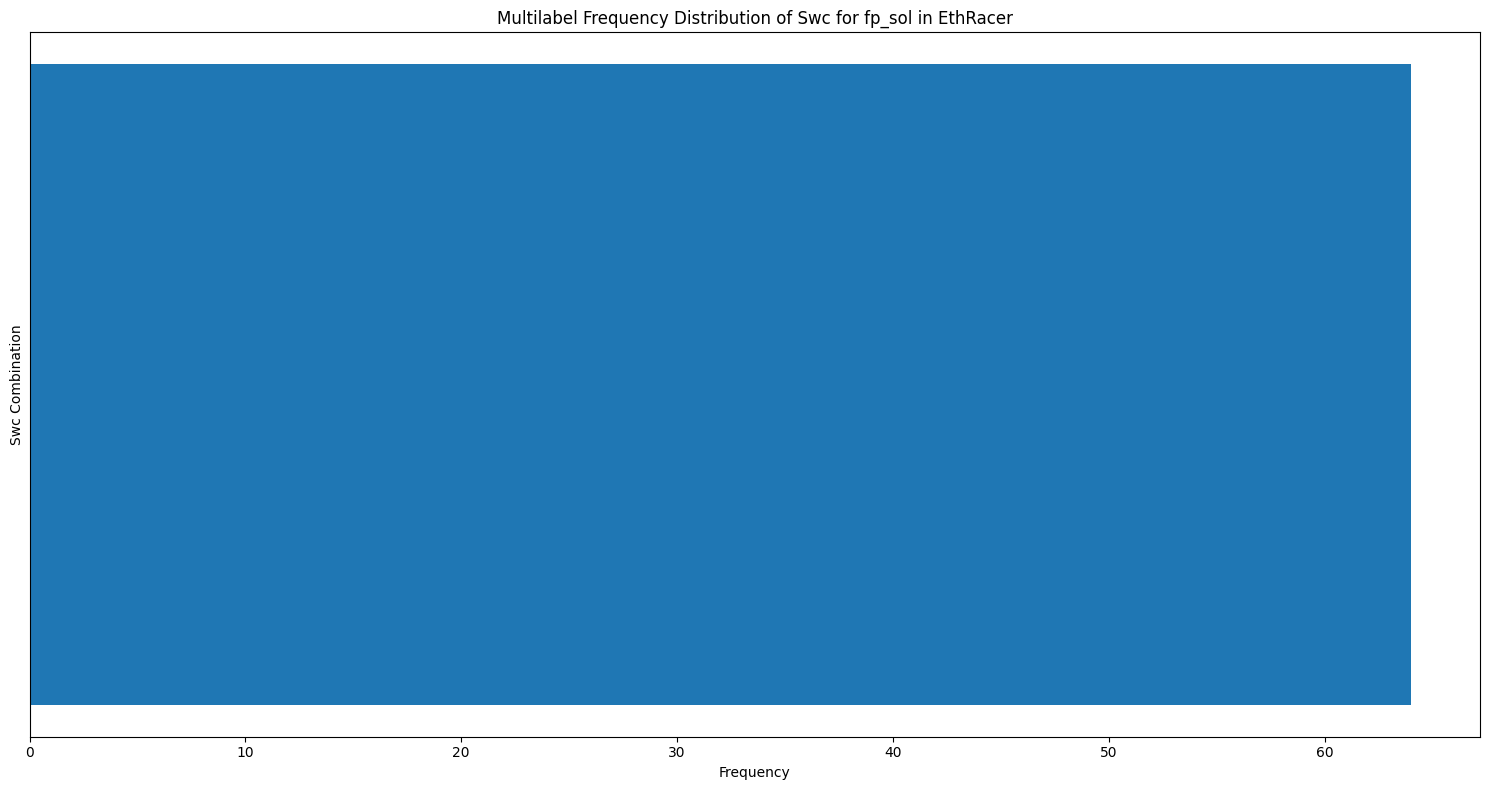

Statistics for dataset: EthRacer and column: dasp
       frequency
count        1.0
mean        64.0
std          NaN
min         64.0
25%         64.0
50%         64.0
75%         64.0
max         64.0
  dasp_combination  frequency
0           (7.0,)         64


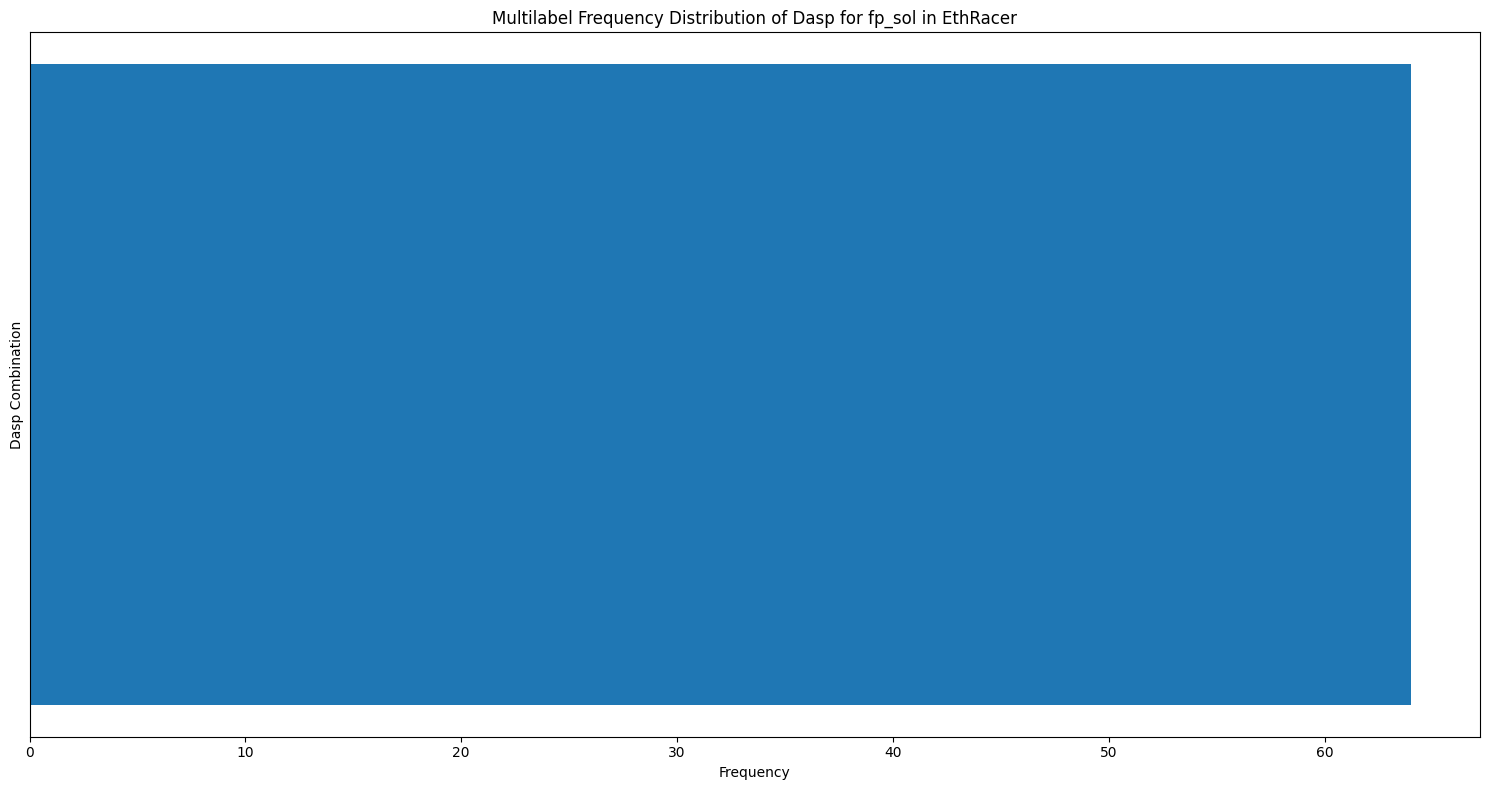

Statistics for dataset: EverEvolvingG and column: property
       frequency
count    5.00000
mean    52.80000
std     74.73085
min      6.00000
25%     15.00000
50%     15.00000
75%     44.00000
max    184.00000
     property_combination  frequency
0      (airdrop-hunting,)        184
1             (honeypot,)         44
2  (call-after-destruct,)         15
3     (integer-overflow,)         15
4           (reentrancy,)          6


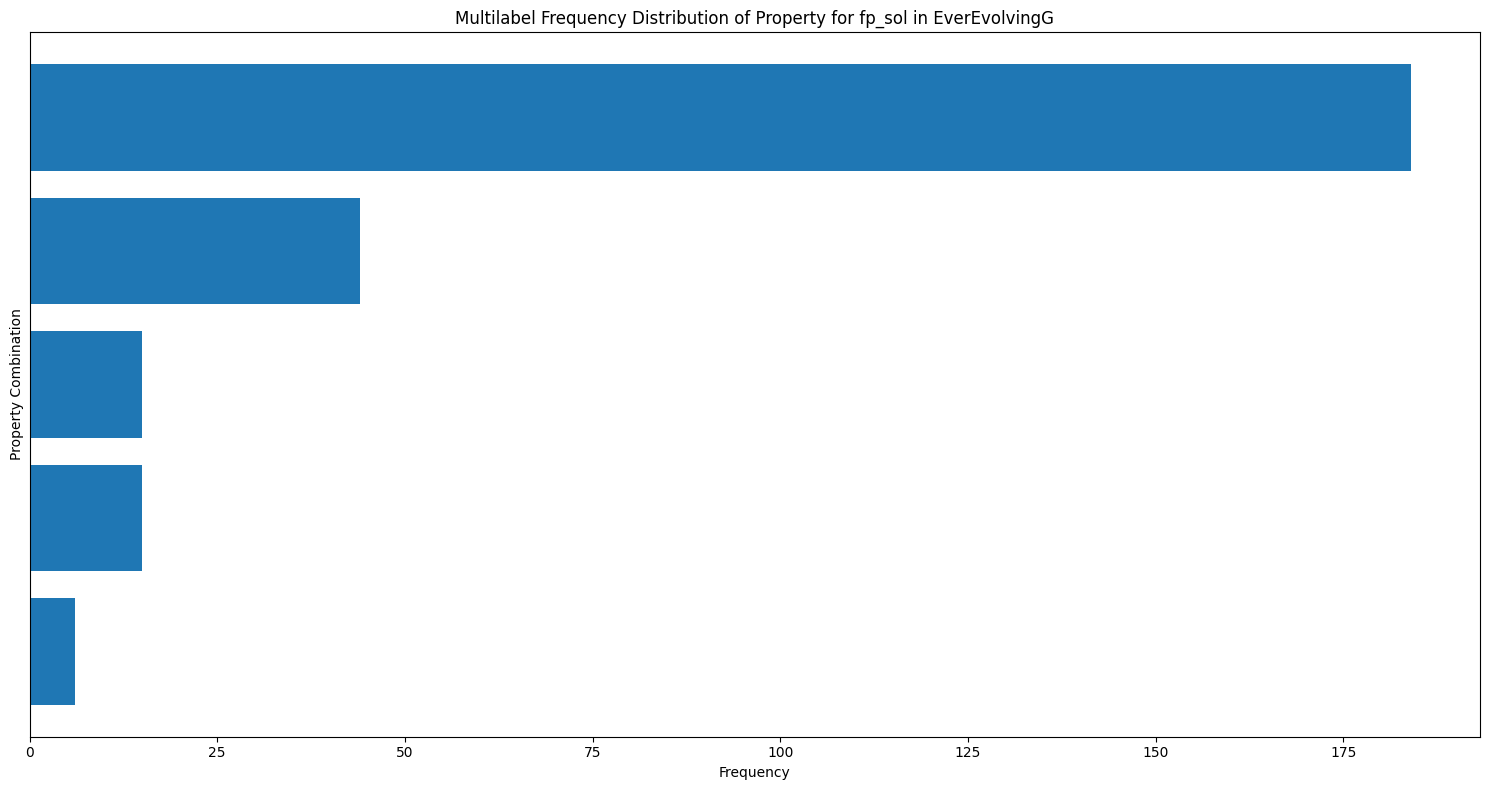

Statistics for dataset: EverEvolvingG and column: swc
        frequency
count    4.000000
mean    66.000000
std     90.136933
min      6.000000
25%     12.750000
50%     29.500000
75%     82.750000
max    199.000000
  swc_combination  frequency
0          (nan,)        199
1        (996.0,)         44
2        (101.0,)         15
3        (107.0,)          6


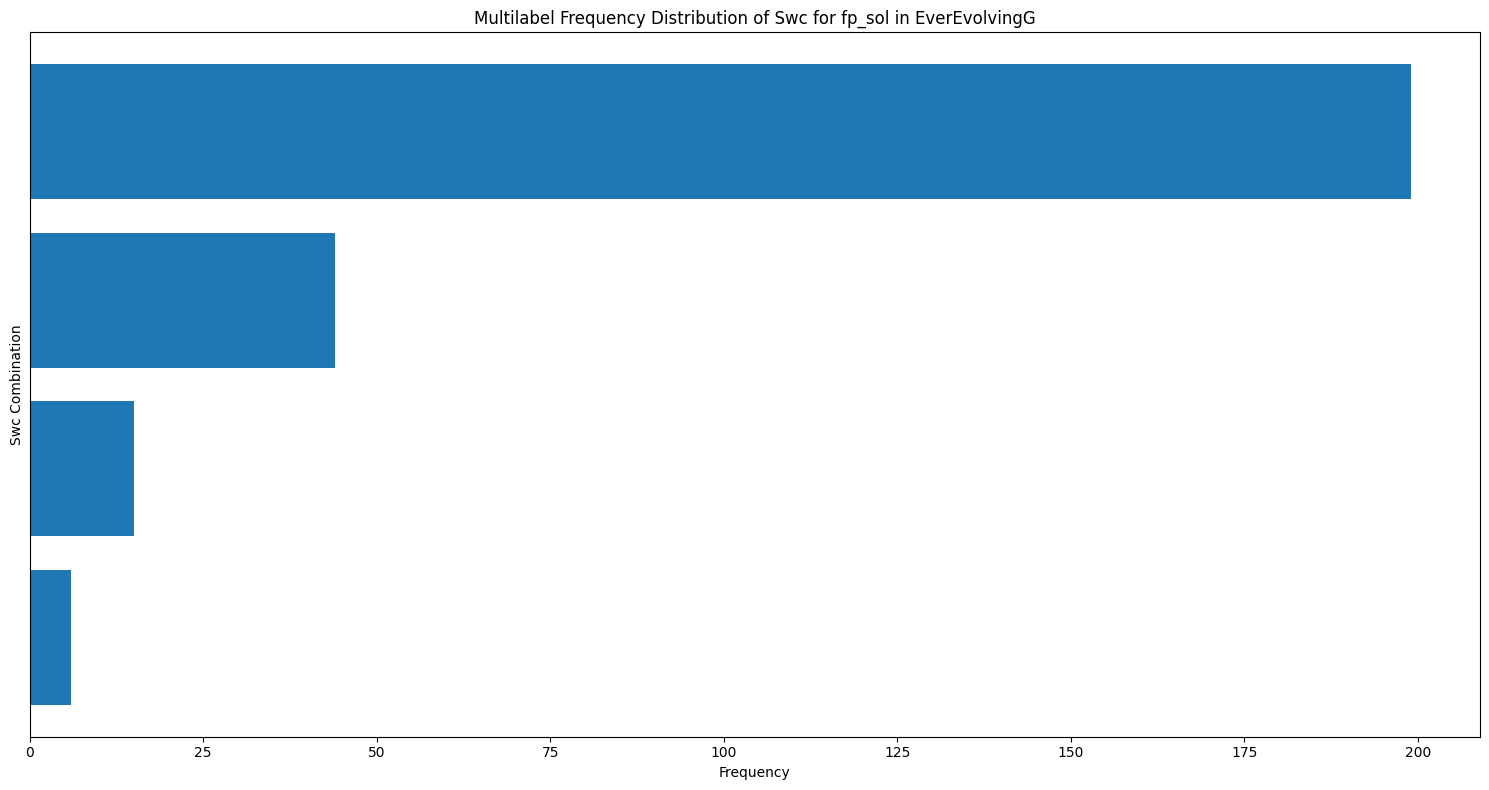

Statistics for dataset: EverEvolvingG and column: dasp
        frequency
count    3.000000
mean    88.000000
std    134.309344
min      6.000000
25%     10.500000
50%     15.000000
75%    129.000000
max    243.000000
  dasp_combination  frequency
0           (nan,)        243
1           (3.0,)         15
2           (1.0,)          6


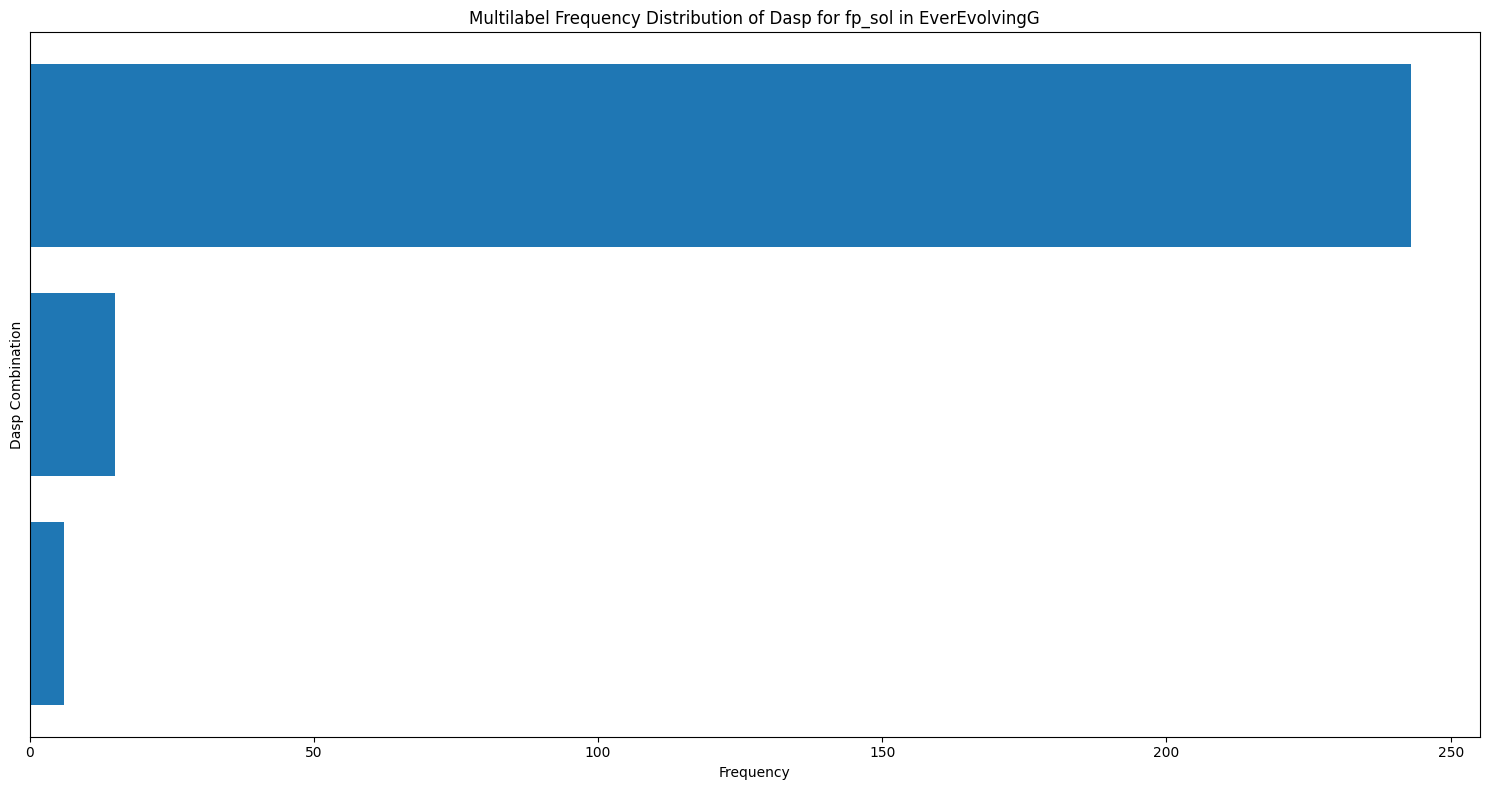

Statistics for dataset: NPChecker and column: property
       frequency
count   7.000000
mean    2.142857
std     1.676163
min     1.000000
25%     1.000000
50%     1.000000
75%     3.000000
max     5.000000
                           property_combination  frequency
0             (System Property Dependence, TOD)          5
1                             (Unchecked Call,)          4
2                                        (TOD,)          2
3                  (Reentrancy, Unchecked Call)          1
4  (System Property Dependence, Unchecked Call)          1
5                         (TOD, Unchecked Call)          1
6                            (Failed Call, TOD)          1


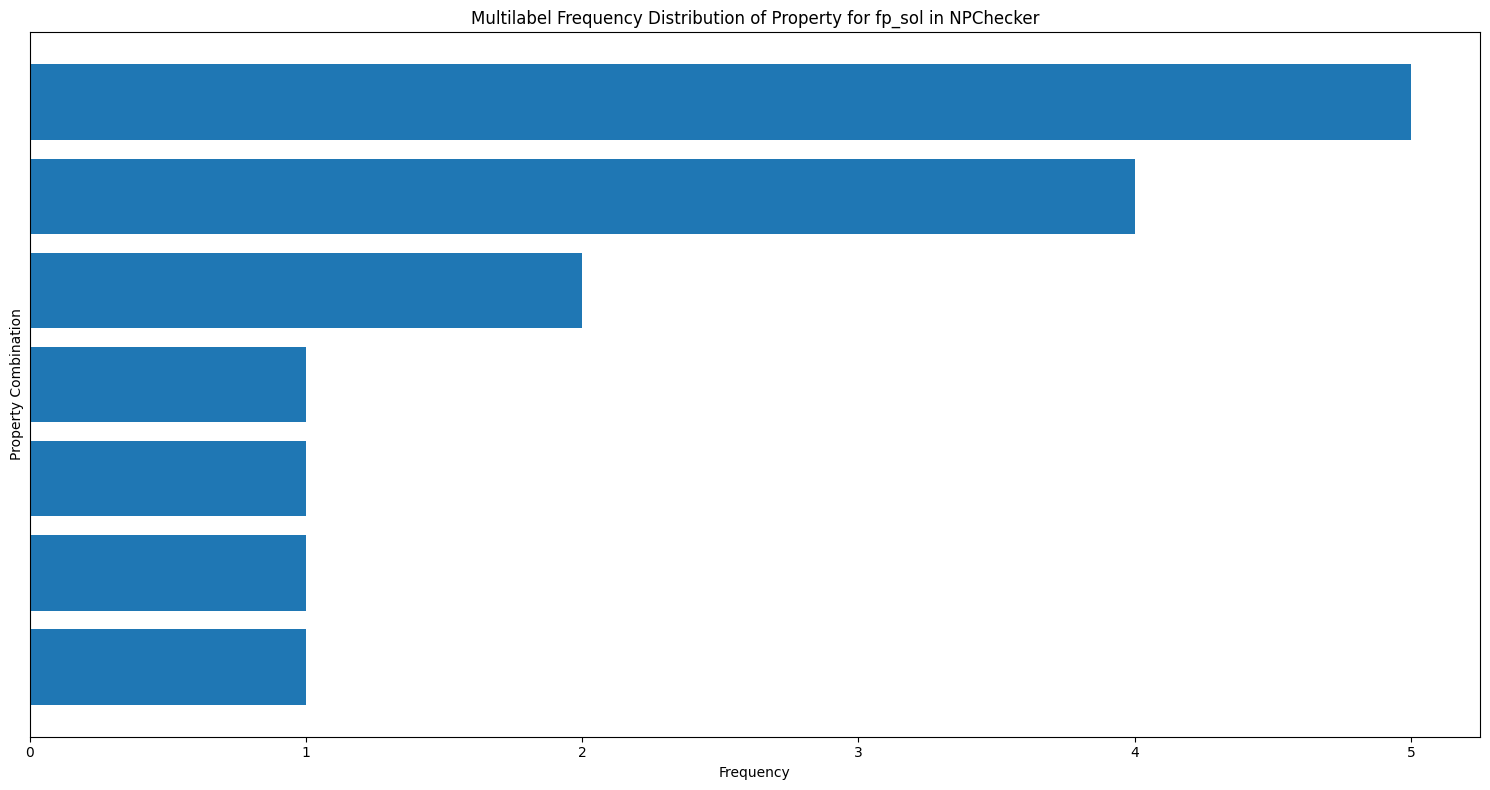

Statistics for dataset: NPChecker and column: swc
       frequency
count   7.000000
mean    2.142857
std     1.676163
min     1.000000
25%     1.000000
50%     1.000000
75%     3.000000
max     5.000000
  swc_combination  frequency
0  (114.0, 120.0)          5
1        (104.0,)          4
2        (114.0,)          2
3  (104.0, 107.0)          1
4  (104.0, 120.0)          1
5  (104.0, 114.0)          1
6  (113.0, 114.0)          1


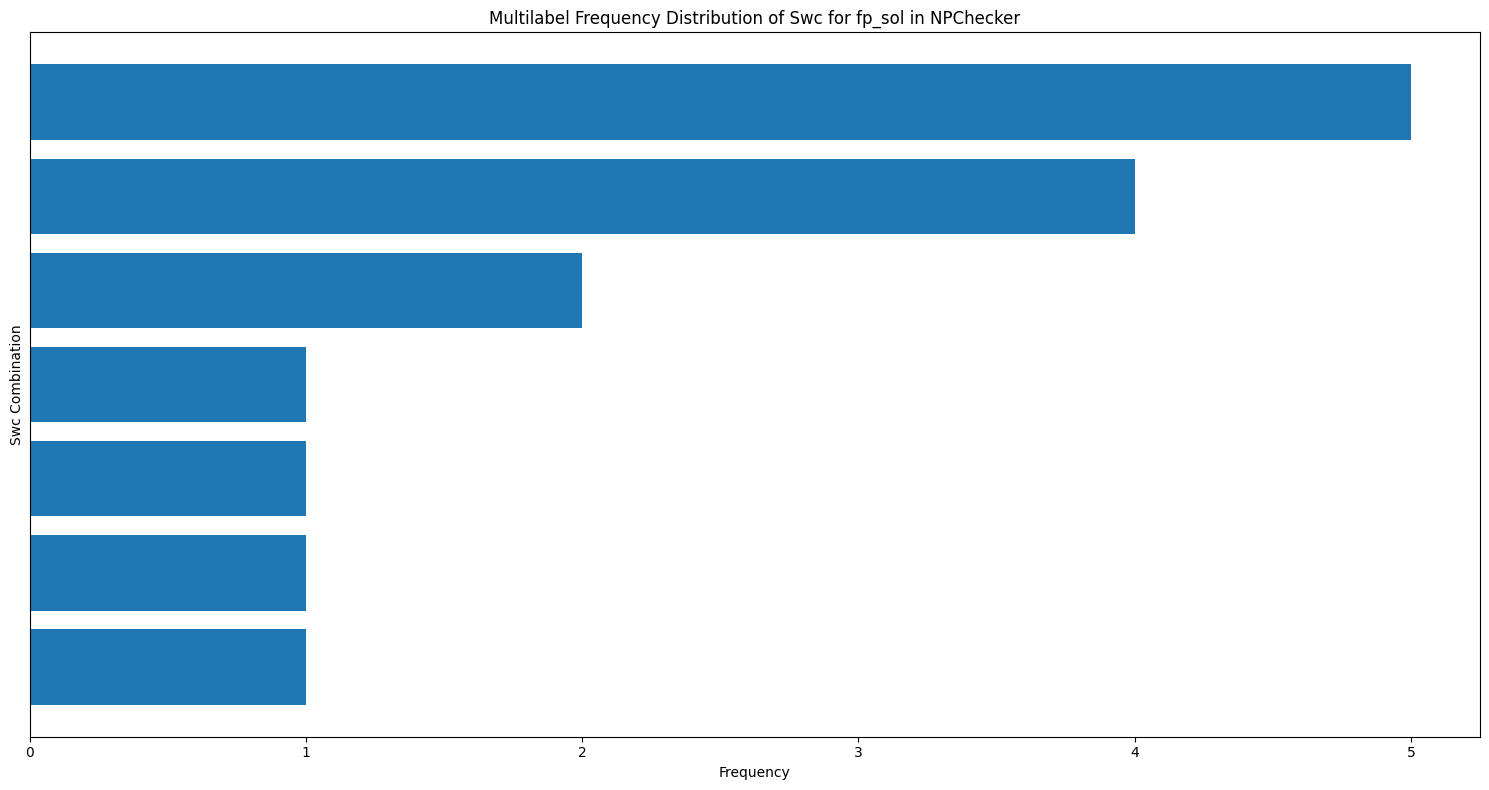

Statistics for dataset: NPChecker and column: dasp
       frequency
count   7.000000
mean    2.142857
std     1.676163
min     1.000000
25%     1.000000
50%     1.000000
75%     3.000000
max     5.000000
  dasp_combination  frequency
0       (6.0, 7.0)          5
1           (4.0,)          4
2           (7.0,)          2
3       (1.0, 4.0)          1
4       (4.0, 6.0)          1
5       (4.0, 7.0)          1
6       (5.0, 7.0)          1


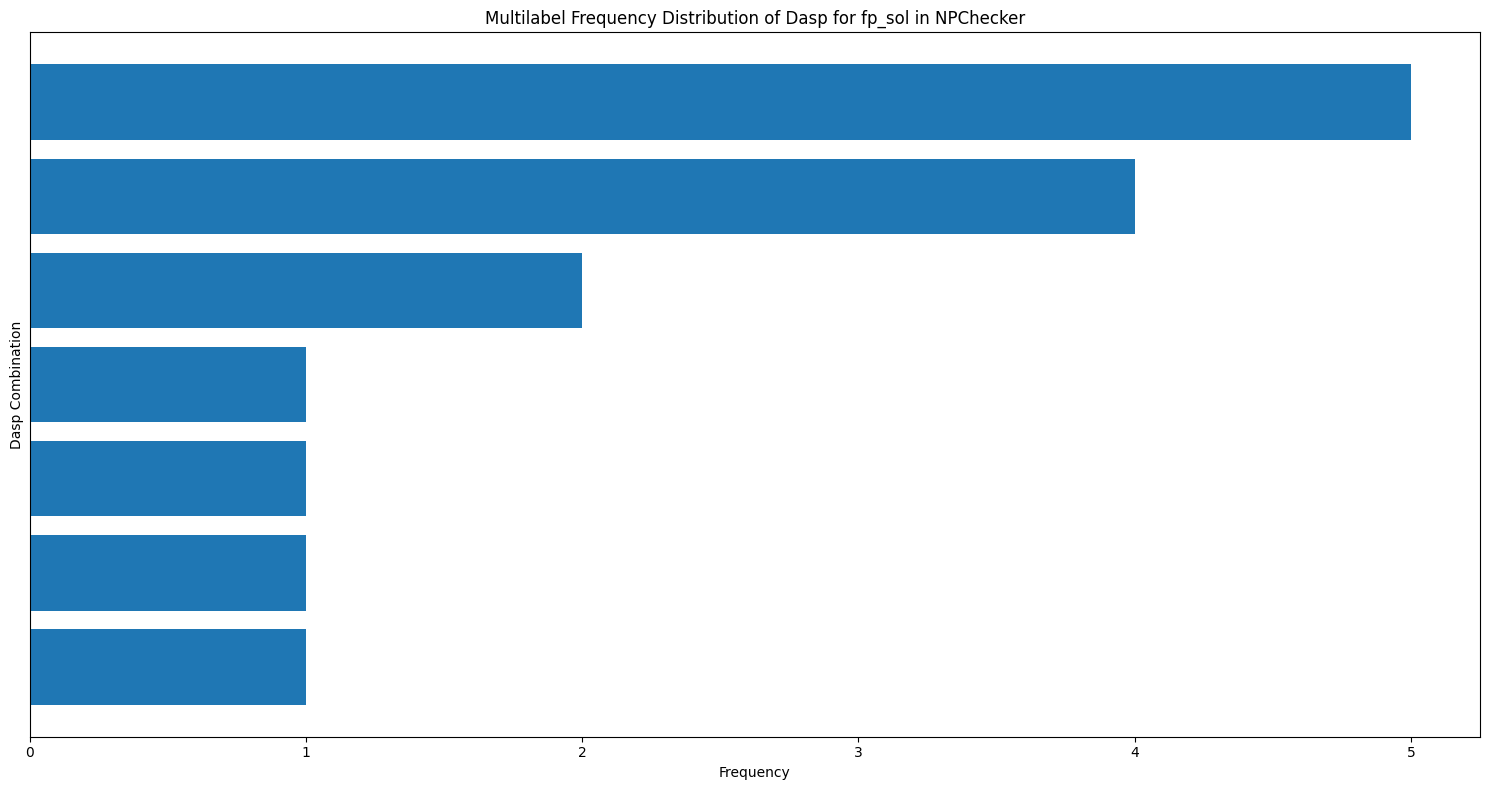

Statistics for dataset: NotSoSmartC and column: property
       frequency
count  18.000000
mean    1.277778
std     0.574513
min     1.000000
25%     1.000000
50%     1.000000
75%     1.000000
max     3.000000
                property_combination  frequency
0                         (SWC-107,)          3
1                         (SWC-124,)          2
2                         (SWC-113,)          2
3                         (SWC-118,)          2
4                         (SWC-119,)          1
5     (Honeypot Straw man contract,)          1
6                         (SWC-114,)          1
7       (Honeypot Balance disorder,)          1
8                 (SWC-113, SWC-128)          1
9                         (SWC-132,)          1
10  (Honeypot Uninitialised struct,)          1
11                        (SWC-104,)          1
12  (Honeypot Inheritance disorder,)          1
13                        (SWC-101,)          1
14            (Incorrect interface,)          1
15   (Honeypot Hidden 

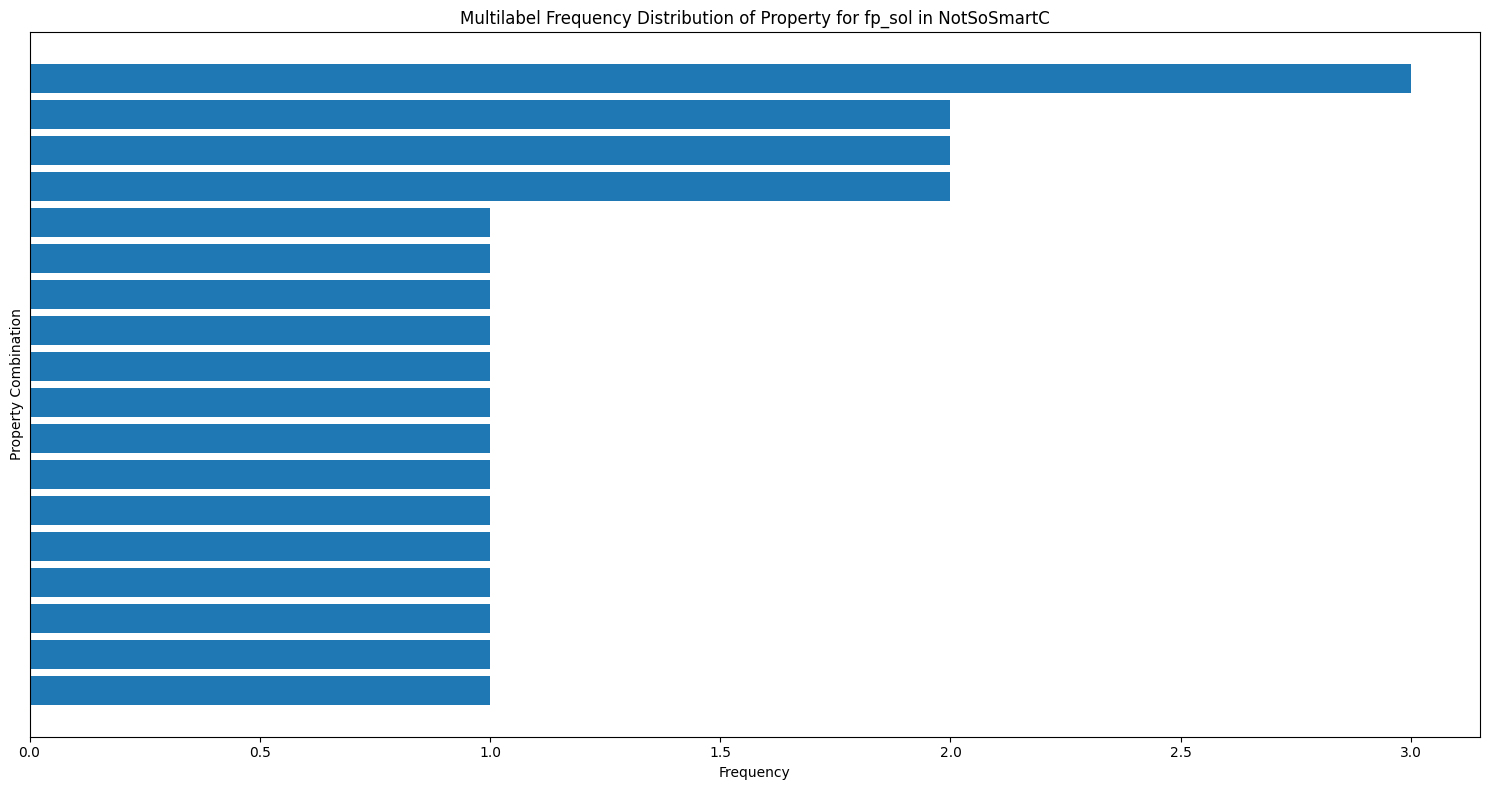

Statistics for dataset: NotSoSmartC and column: swc
       frequency
count  13.000000
mean    1.769231
std     1.423250
min     1.000000
25%     1.000000
50%     1.000000
75%     2.000000
max     6.000000
   swc_combination  frequency
0         (996.0,)          6
1         (107.0,)          3
2         (118.0,)          2
3         (113.0,)          2
4         (124.0,)          2
5         (119.0,)          1
6         (120.0,)          1
7           (nan,)          1
8         (101.0,)          1
9         (104.0,)          1
10        (132.0,)          1
11  (113.0, 128.0)          1
12        (114.0,)          1


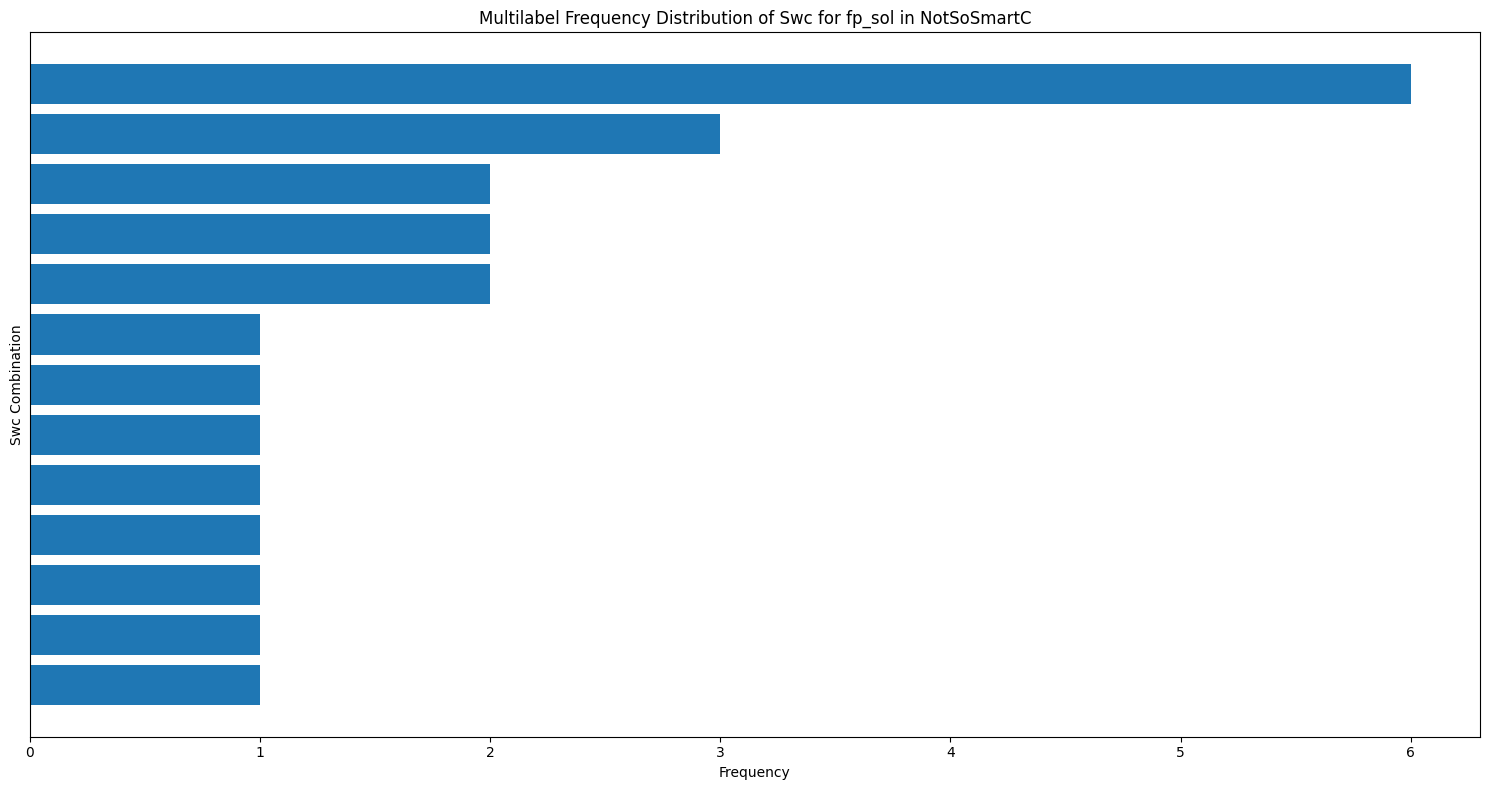

Statistics for dataset: NotSoSmartC and column: dasp
       frequency
count   8.000000
mean    2.875000
std     2.748376
min     1.000000
25%     1.000000
50%     2.000000
75%     3.250000
max     9.000000
  dasp_combination  frequency
0           (nan,)          9
1           (2.0,)          4
2           (1.0,)          3
3           (5.0,)          3
4           (6.0,)          1
5           (3.0,)          1
6           (4.0,)          1
7           (7.0,)          1


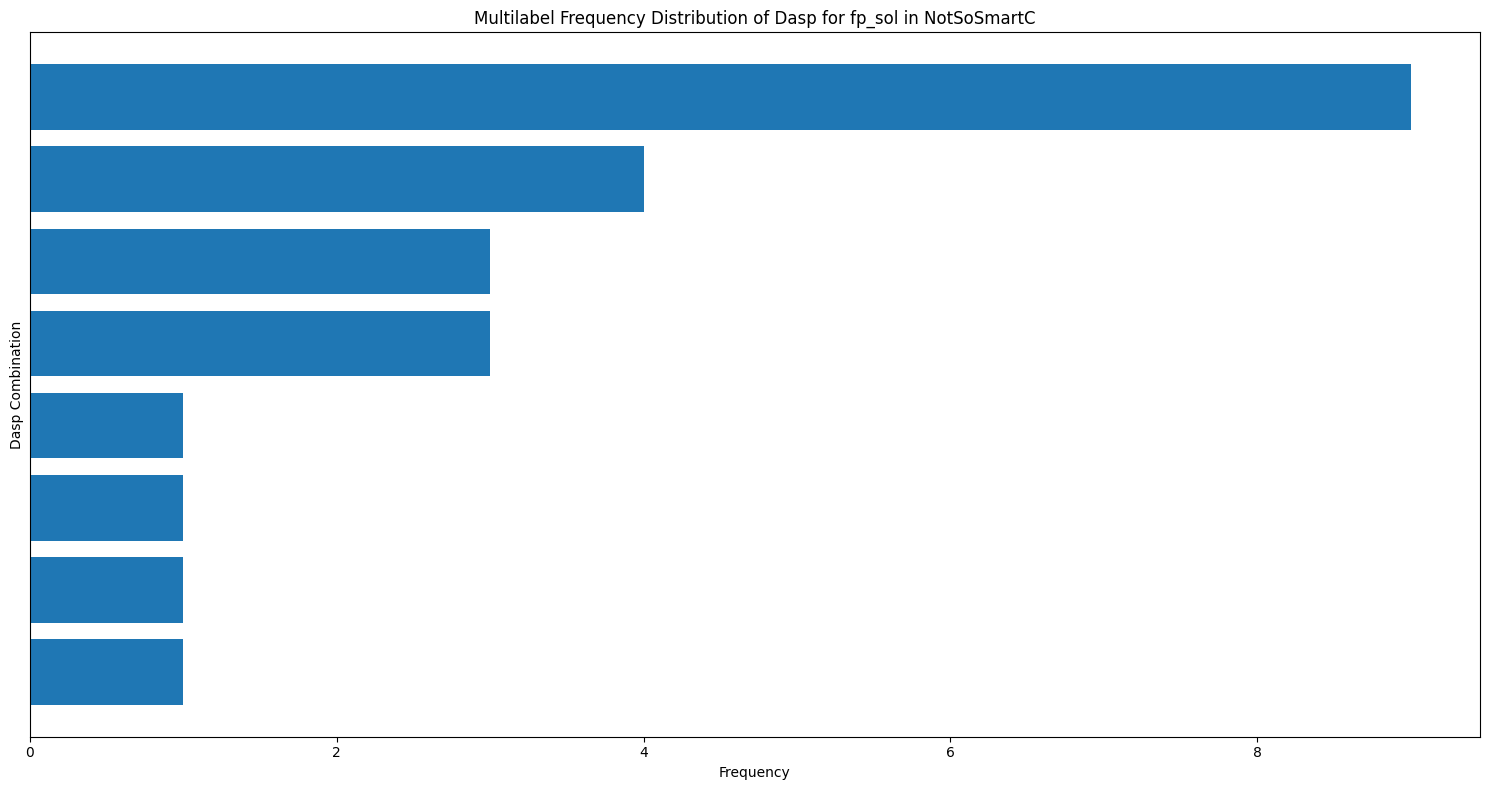

Statistics for dataset: Zeus and column: property
        frequency
count   36.000000
mean    19.888889
std     38.045670
min      1.000000
25%      1.000000
50%      4.500000
75%     14.500000
max    194.000000
                                 property_combination  frequency
0                                     (Int_overflow,)        194
1           (Int_overflow, Tx_Order_Dep, Unchkd_send)         98
2                         (Failed_send, Int_overflow)         77
3           (Failed_send, Int_overflow, Tx_Order_Dep)         66
4   (Blk_State_Dep, Failed_send, Int_overflow, Tx_...         52
5                        (Int_overflow, Tx_Order_Dep)         37
6   (Blk_State_Dep, Int_overflow, Tx_Order_Dep, Un...         36
7                                      (Failed_send,)         28
8                         (Failed_send, Tx_Order_Dep)         22
9   (Failed_send, Int_overflow, Tx_Order_Dep, Unch...         12
10                         (Int_overflow, Reentrancy)         10
11      

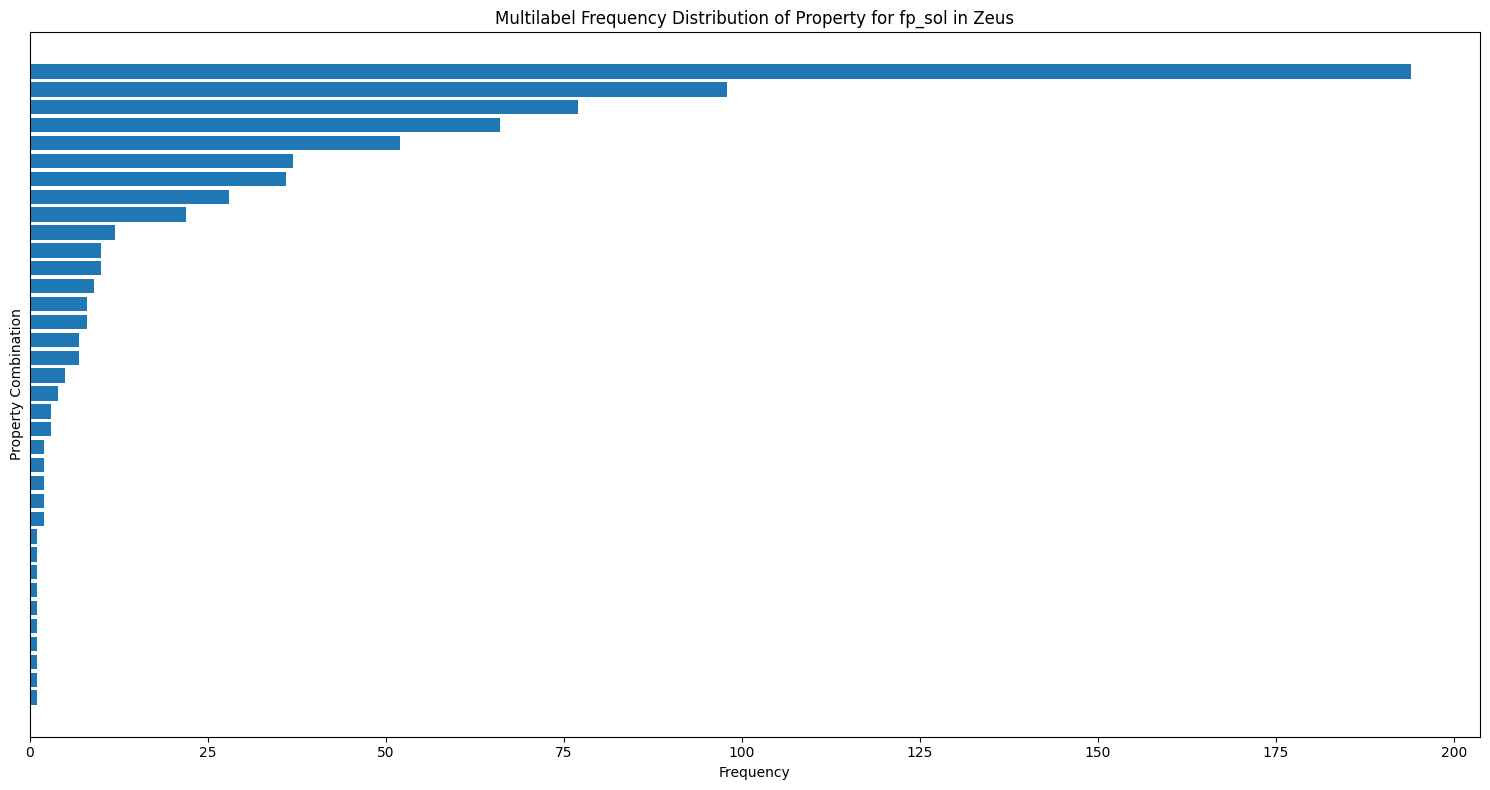

Statistics for dataset: Zeus and column: swc
        frequency
count   36.000000
mean    19.888889
std     38.045670
min      1.000000
25%      1.000000
50%      4.500000
75%     14.500000
max    194.000000
                        swc_combination  frequency
0                              (101.0,)        194
1                 (101.0, 104.0, 114.0)         98
2                        (101.0, 113.0)         77
3                 (101.0, 113.0, 114.0)         66
4          (101.0, 113.0, 114.0, 120.0)         52
5                        (101.0, 114.0)         37
6          (101.0, 104.0, 114.0, 120.0)         36
7                              (113.0,)         28
8                        (113.0, 114.0)         22
9          (101.0, 104.0, 113.0, 114.0)         12
10                       (101.0, 107.0)         10
11                (101.0, 114.0, 120.0)         10
12                (101.0, 113.0, 120.0)          9
13                             (120.0,)          8
14                          

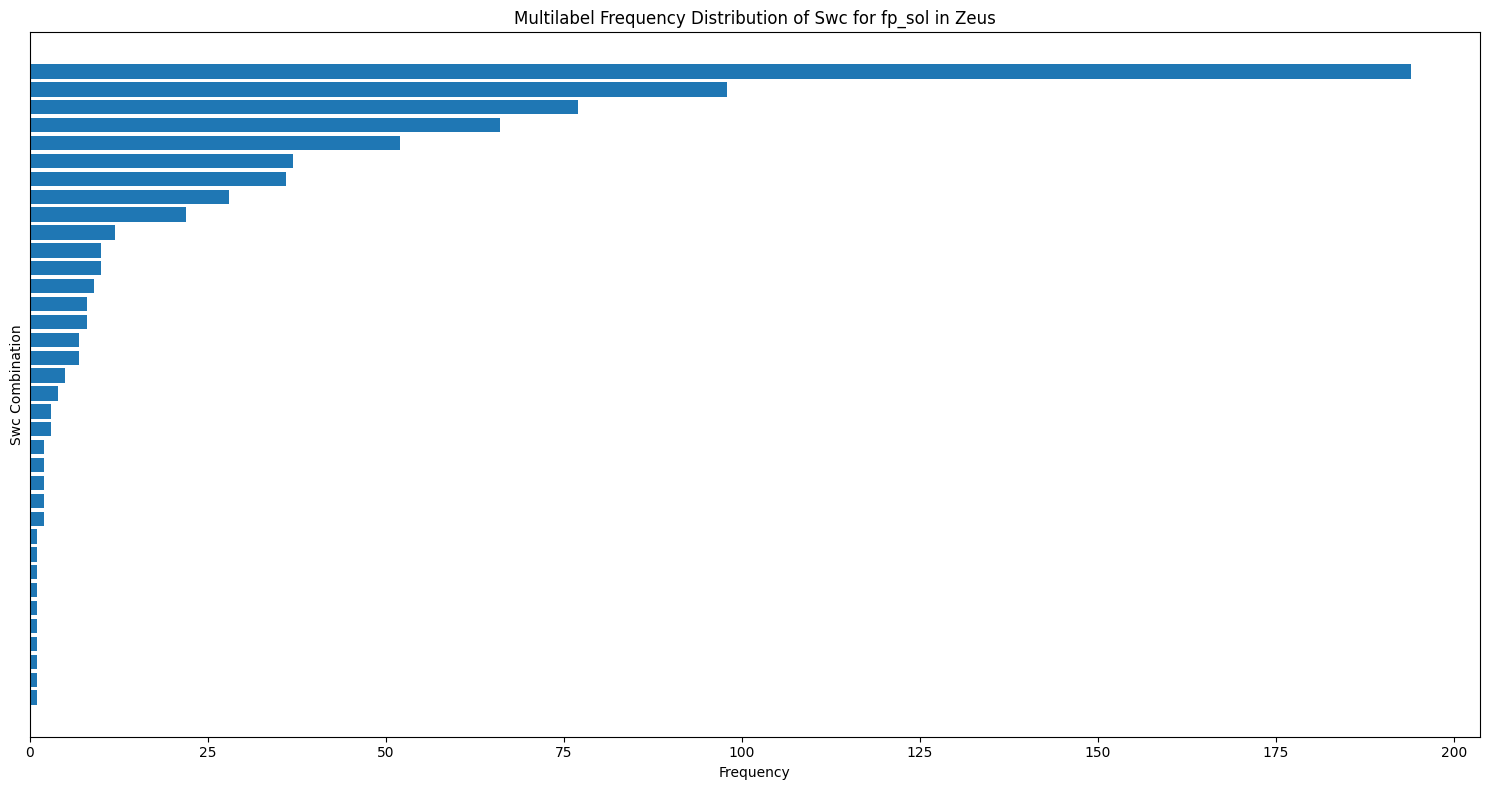

Statistics for dataset: Zeus and column: dasp
        frequency
count   36.000000
mean    19.888889
std     38.045670
min      1.000000
25%      1.000000
50%      4.500000
75%     14.500000
max    194.000000
             dasp_combination  frequency
0                      (3.0,)        194
1             (3.0, 4.0, 7.0)         98
2                  (3.0, 5.0)         77
3             (3.0, 5.0, 7.0)         66
4        (3.0, 5.0, 6.0, 7.0)         52
5                  (3.0, 7.0)         37
6        (3.0, 4.0, 6.0, 7.0)         36
7                      (5.0,)         28
8                  (5.0, 7.0)         22
9        (3.0, 4.0, 5.0, 7.0)         12
10                 (1.0, 3.0)         10
11            (3.0, 6.0, 7.0)         10
12            (3.0, 5.0, 6.0)          9
13                     (6.0,)          8
14                     (7.0,)          8
15                 (3.0, 6.0)          7
16  (3.0, 4.0, 5.0, 6.0, 7.0)          7
17                     (1.0,)          5
18           

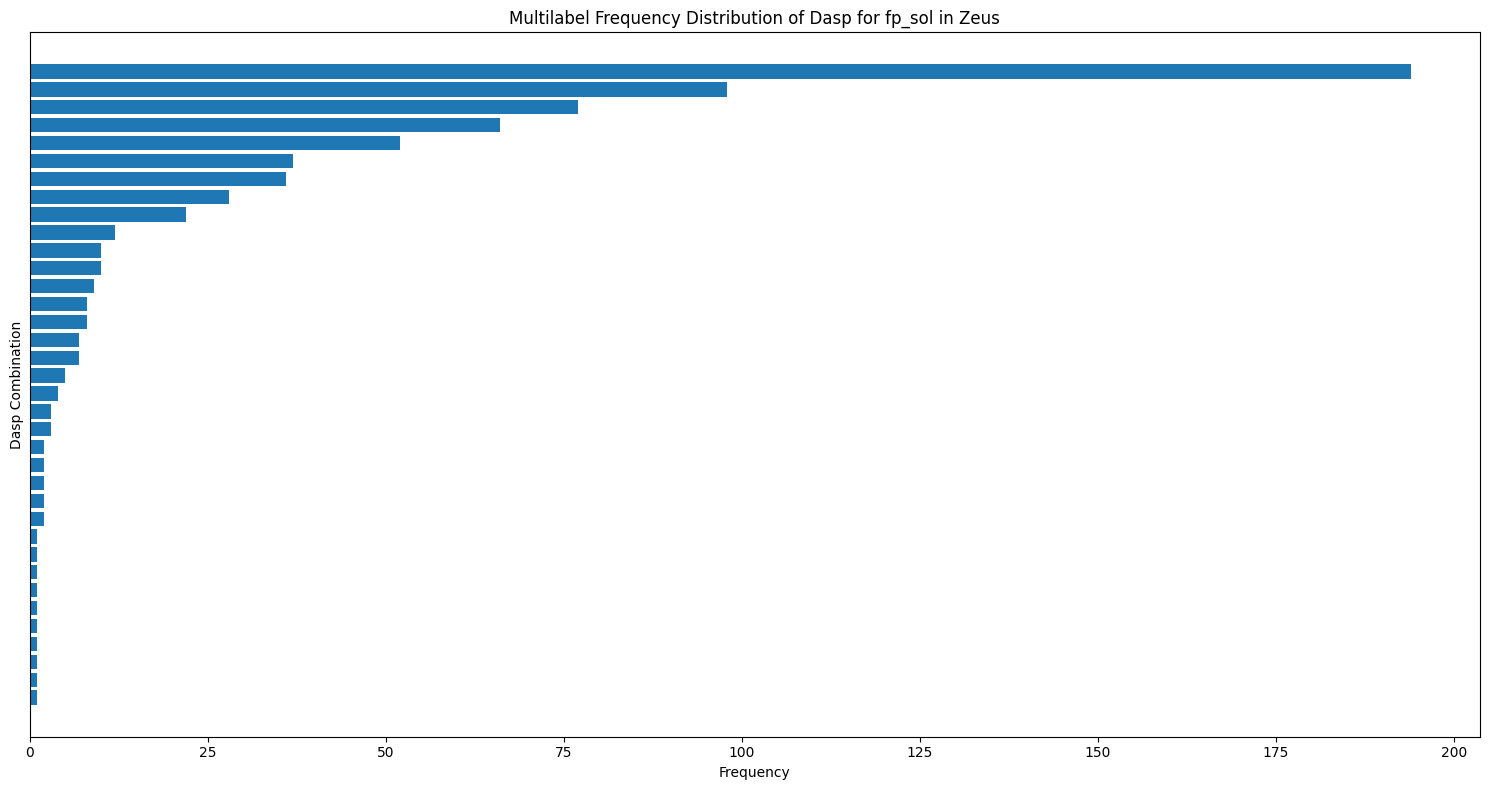

Statistics for dataset: eThor and column: property
       frequency
count        1.0
mean       172.0
std          NaN
min        172.0
25%        172.0
50%        172.0
75%        172.0
max        172.0
  property_combination  frequency
0        (reentrancy,)        172


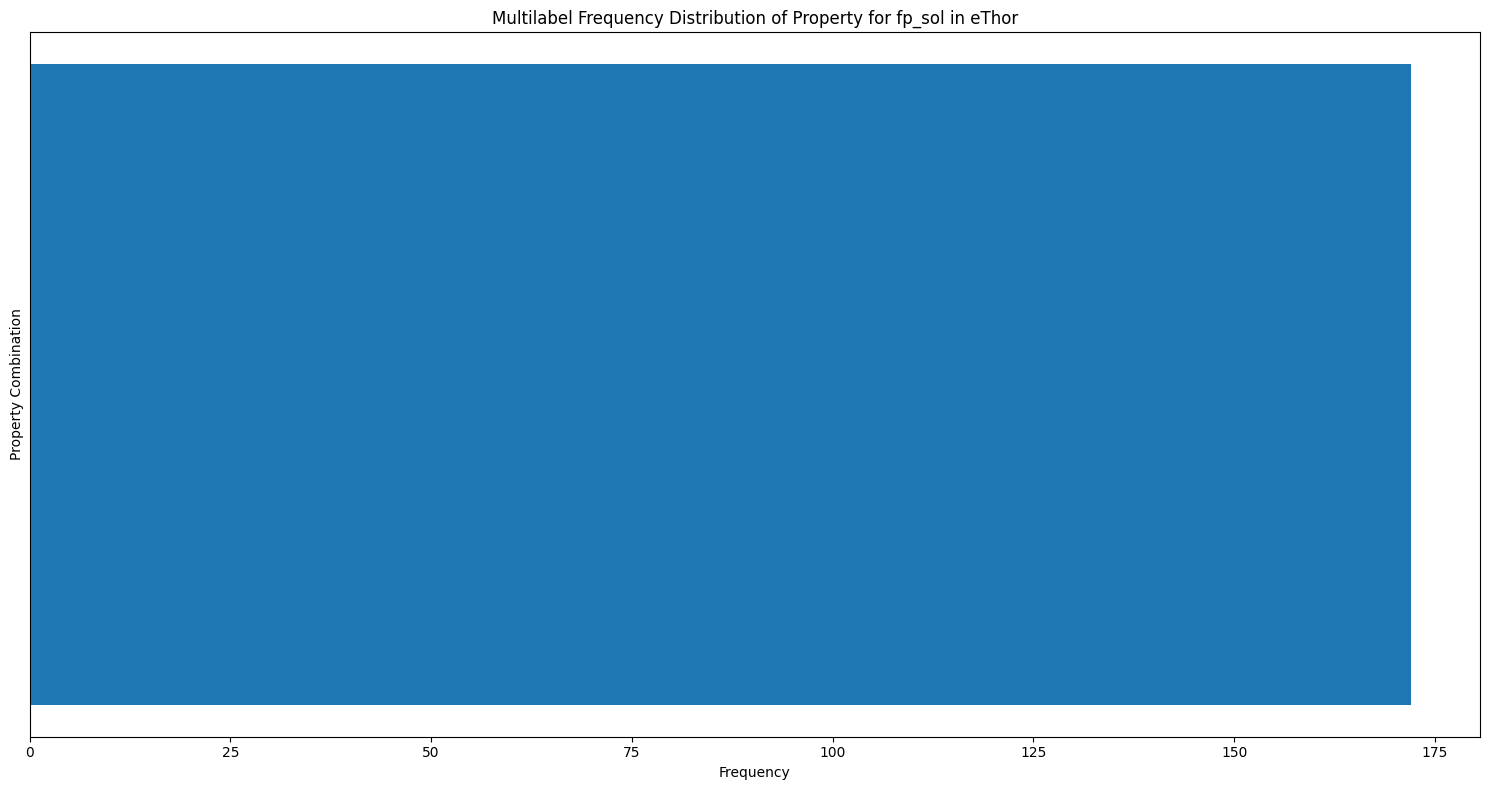

Statistics for dataset: eThor and column: swc
       frequency
count        1.0
mean       172.0
std          NaN
min        172.0
25%        172.0
50%        172.0
75%        172.0
max        172.0
  swc_combination  frequency
0        (107.0,)        172


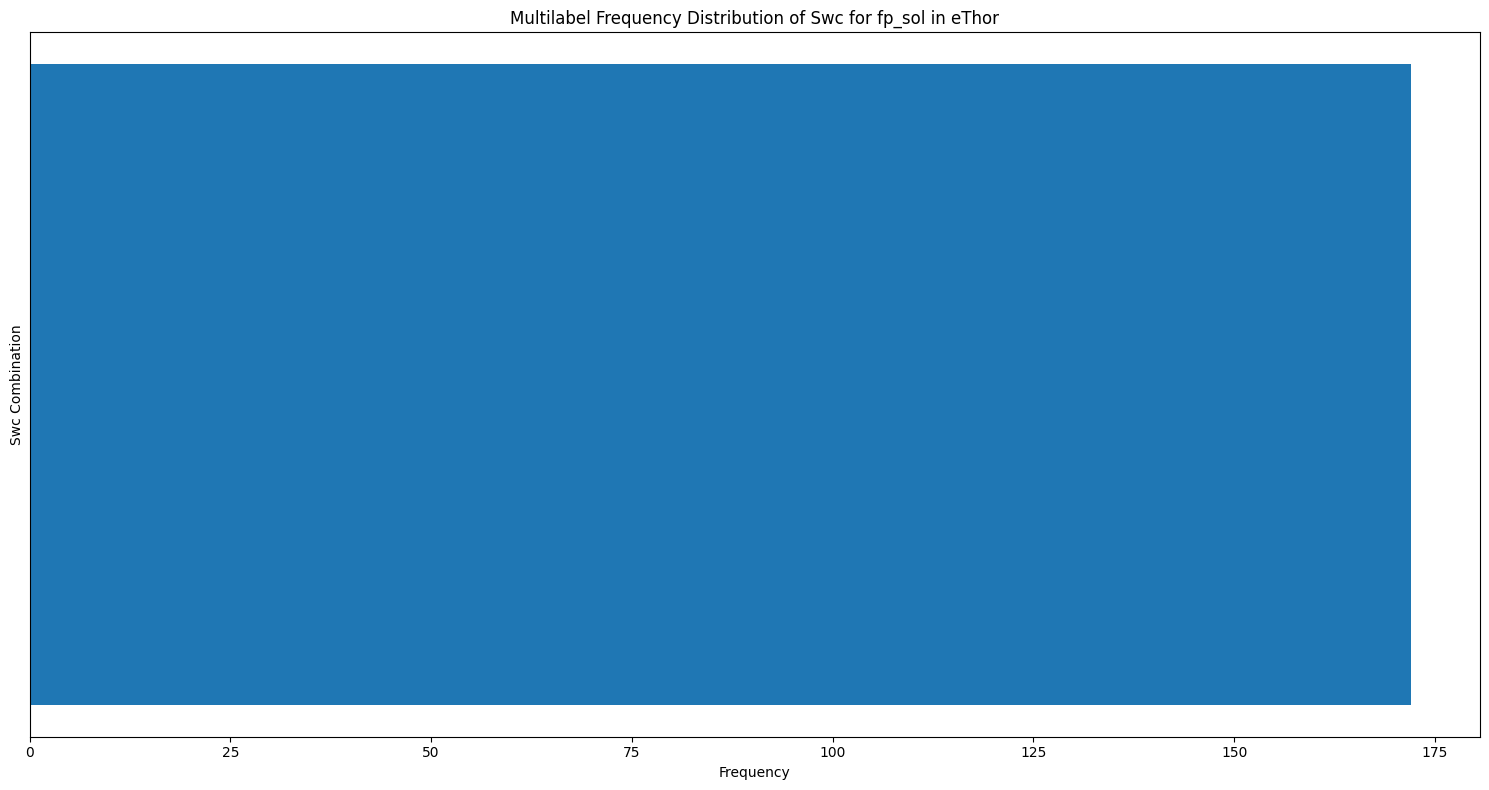

Statistics for dataset: eThor and column: dasp
       frequency
count        1.0
mean       172.0
std          NaN
min        172.0
25%        172.0
50%        172.0
75%        172.0
max        172.0
  dasp_combination  frequency
0           (1.0,)        172


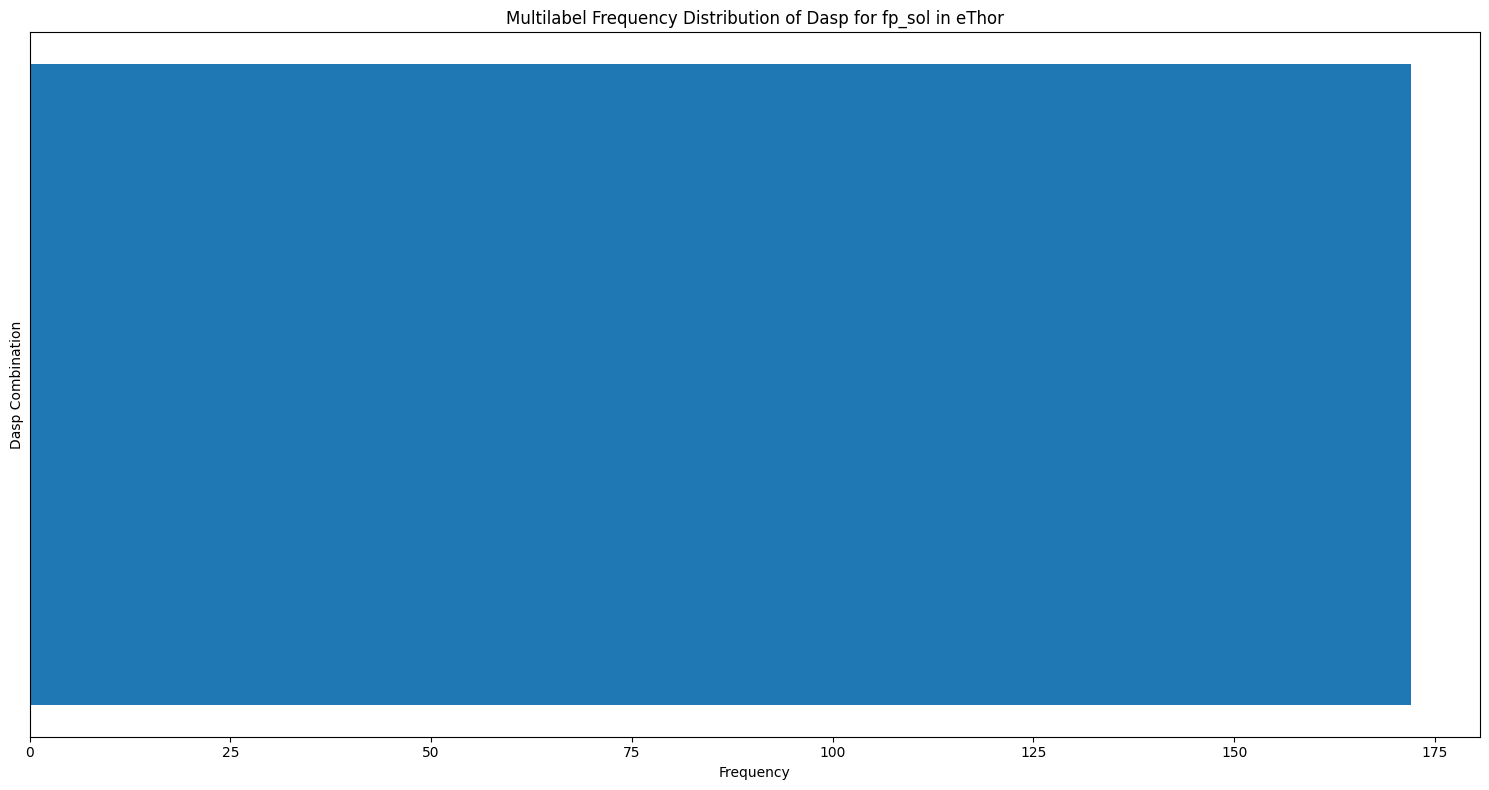

In [8]:
# Filter the dataset to include only rows where 'property_holds' equals True
df = df[df['property_holds'] == "t"]

# Function to plot multilabel frequency distribution for a given dataset and column
def plot_multilabel_distribution(data, dataset_name, column):
    # Group by 'fp_sol' and aggregate the column values (property, swc, dasp) into a list
    combinations = data.groupby('fp_sol')[column].apply(lambda x: tuple(sorted(set(x)))).reset_index()

    # Count the frequency of each unique combination of column values
    combination_counts = combinations[column].value_counts().reset_index()
    combination_counts.columns = [f'{column}_combination', 'frequency']

    # Print statistics
    print(f"Statistics for dataset: {dataset_name} and column: {column}")
    print(combination_counts.describe())
    print(combination_counts)

    # Plot the frequency of each combination
    plt.figure(figsize=(15, 8))
    plt.barh(combination_counts.index, combination_counts['frequency'])
    plt.xlabel('Frequency')
    plt.ylabel(f'{column.capitalize()} Combination')
    plt.title(f'Multilabel Frequency Distribution of {column.capitalize()} for fp_sol in {dataset_name}')
    plt.gca().invert_yaxis()
    plt.yticks([])  # Hide y-axis labels to focus on the distribution
    plt.tight_layout()
    plt.show()

# Get the unique dataset names
unique_datasets = df['dataset'].unique()

# Columns to iterate over
columns_to_analyze = ['property', 'swc', 'dasp']

# Loop through each dataset and column, and create the plot
for dataset in unique_datasets:
    dataset_data = df[df['dataset'] == dataset]
    
    if not dataset_data.empty:  # Check if the dataset_data is not empty
        for column in columns_to_analyze:
            if column in dataset_data.columns:  # Ensure the column exists in the dataset
                plot_multilabel_distribution(dataset_data, dataset, column)
    else:
        print(f"No data for dataset: {dataset}")